## YAP 470/570 Project Report

Name: Ela Doğruyol

Course: YAP570 /YAP470

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
import warnings #for ignoring warnings
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans

In [15]:
warnings.filterwarnings('always')

In [16]:
weather = pd.read_csv('seattle-weather.csv')
weather = weather.replace(to_replace=['rain', 'sun', 'snow', 'drizzle', 'fog'], value=[0, 1, 2, 3, 4])
print(weather)

            date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7        3
1     2012-01-02           10.9      10.6       2.8   4.5        0
2     2012-01-03            0.8      11.7       7.2   2.3        0
3     2012-01-04           20.3      12.2       5.6   4.7        0
4     2012-01-05            1.3       8.9       2.8   6.1        0
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9        0
1457  2015-12-28            1.5       5.0       1.7   1.3        0
1458  2015-12-29            0.0       7.2       0.6   2.6        4
1459  2015-12-30            0.0       5.6      -1.0   3.4        1
1460  2015-12-31            0.0       5.6      -2.1   3.5        1

[1461 rows x 6 columns]


### Exploratory Data Analysis (EDA)

In [17]:
weather.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [18]:
weather.shape

(1461, 6)

In [19]:
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,3
1,2012-01-02,10.9,10.6,2.8,4.5,0
2,2012-01-03,0.8,11.7,7.2,2.3,0
3,2012-01-04,20.3,12.2,5.6,4.7,0
4,2012-01-05,1.3,8.9,2.8,6.1,0


In [20]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 68.6+ KB


In [21]:
weather.describe()

,precipitation,temp_max,temp_min,wind,weather
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136,0.859001
std,6.680194,7.349758,5.023004,1.437825,1.097617
min,0.000000,-1.600000,-7.100000,0.400000,0.000000
25%,0.000000,10.600000,4.400000,2.200000,0.000000
50%,0.000000,15.600000,8.300000,3.000000,1.000000
75%,2.800000,22.200000,12.200000,4.000000,1.000000
max,55.900000,35.600000,18.300000,9.500000,4.000000


In [22]:
weather.min()

date             2012-01-01
precipitation           0.0
temp_max               -1.6
temp_min               -7.1
wind                    0.4
weather                   0
dtype: object

In [23]:
weather.max()

date             2015-12-31
precipitation          55.9
temp_max               35.6
temp_min               18.3
wind                    9.5
weather                   4
dtype: object

In [24]:
weather.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

c:\Users\elado\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\elado\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


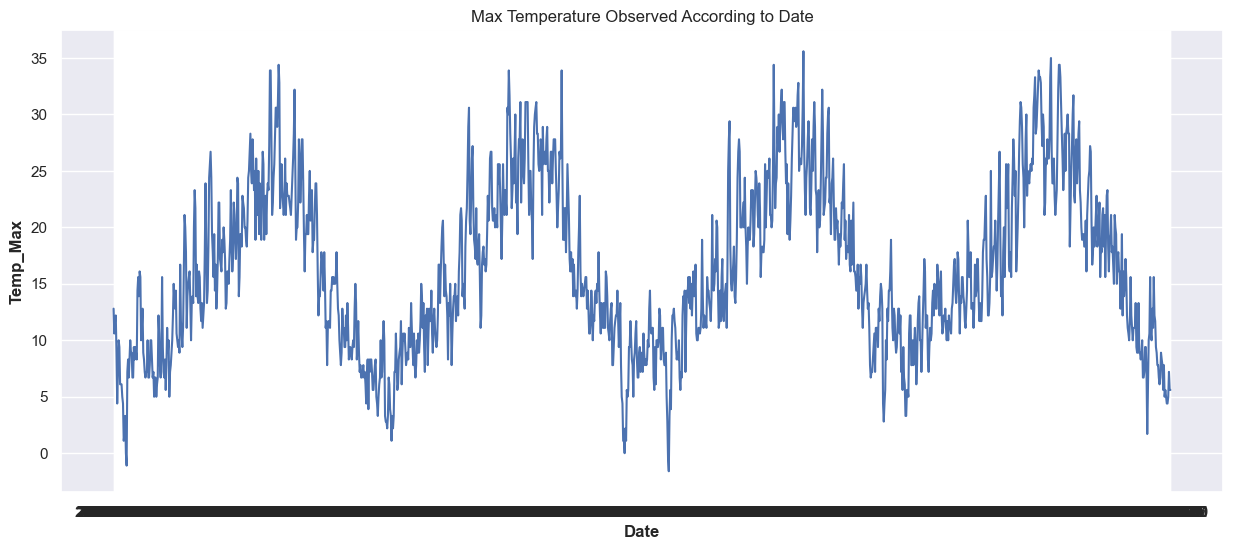

In [25]:
plt.figure(figsize=(15,6))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_max',data=weather)
plt.xlabel("Date",fontweight='bold')
plt.ylabel("Temp_Max",fontweight='bold')
plt.title('Max Temperature Observed According to Date')
plt.show()

c:\Users\elado\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\elado\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


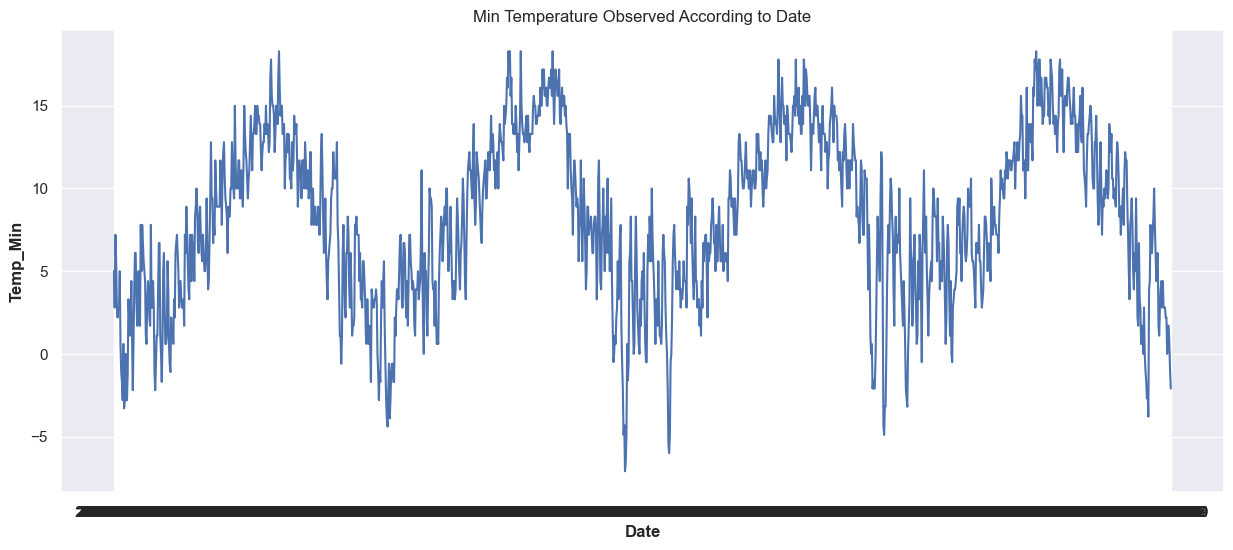

In [26]:
plt.figure(figsize=(15,6))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_min',data=weather)
plt.xlabel("Date",fontweight='bold')
plt.ylabel("Temp_Min",fontweight='bold')
plt.title('Min Temperature Observed According to Date')
plt.show()

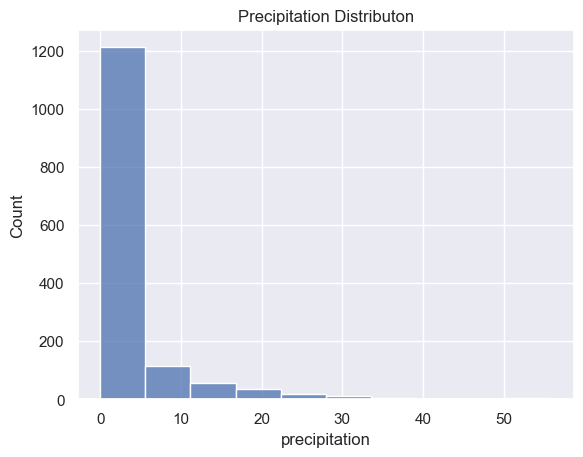

In [27]:
sns.histplot(data=weather, x='precipitation', bins = 10)
plt.title('Precipitation Distributon')
plt.show()

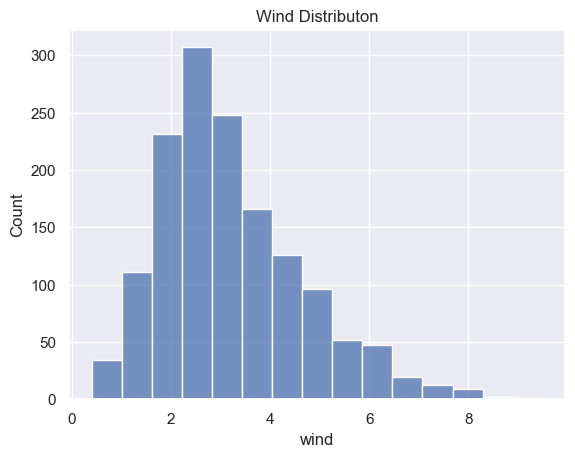

In [28]:
sns.histplot(data=weather, x='wind', bins=15)
plt.title('Wind Distributon')
plt.show()

Text(0, 0.5, 'Count')

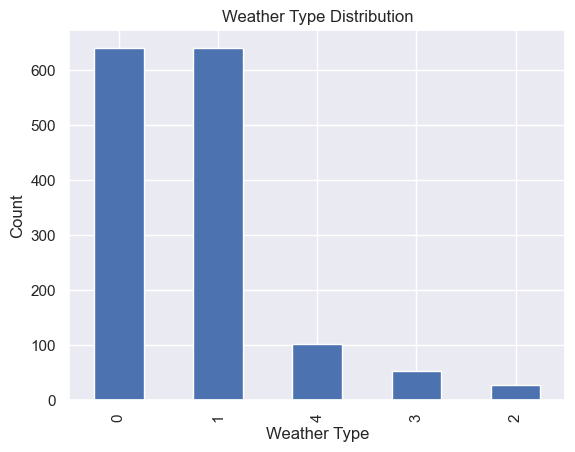

In [29]:
ax = weather['weather'].value_counts() \
    .plot(kind='bar', title='Weather Type Distribution')

ax.set_xlabel('Weather Type')
ax.set_ylabel('Count')

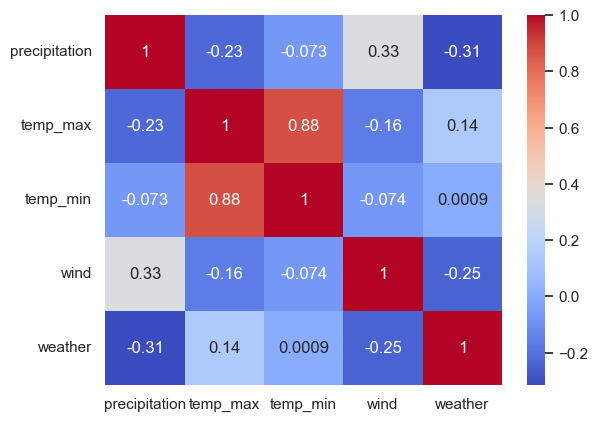

In [30]:
sns.heatmap(weather.corr(), annot=True, cmap='coolwarm')
plt.show()

### Preprocessing

In [31]:
weather['date'] = pd.to_datetime(weather['date'])
weather['month'] = weather['date'].dt.month
weather['month'] = weather['month'].replace(to_replace=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], value=[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 0])
weather.drop('date', axis=1, inplace=True)
weather = weather.rename(columns = {'month':'season'})

In [32]:
weather.nunique()

precipitation    111
temp_max          67
temp_min          55
wind              79
weather            5
season             4
dtype: int64

In [33]:
onehot_vector = pd.get_dummies(weather.season, prefix='season')
weather = pd.concat([weather, onehot_vector], axis=1)
weather = weather.drop('season',axis=1)
print(weather)

      precipitation  temp_max  temp_min  wind  weather  season_0  season_1  \
0               0.0      12.8       5.0   4.7        3         1         0   
1              10.9      10.6       2.8   4.5        0         1         0   
2               0.8      11.7       7.2   2.3        0         1         0   
3              20.3      12.2       5.6   4.7        0         1         0   
4               1.3       8.9       2.8   6.1        0         1         0   
...             ...       ...       ...   ...      ...       ...       ...   
1456            8.6       4.4       1.7   2.9        0         1         0   
1457            1.5       5.0       1.7   1.3        0         1         0   
1458            0.0       7.2       0.6   2.6        4         1         0   
1459            0.0       5.6      -1.0   3.4        1         1         0   
1460            0.0       5.6      -2.1   3.5        1         1         0   

      season_2  season_3  
0            0         0  
1        

c:\Users\elado\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):
c:\Users\elado\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


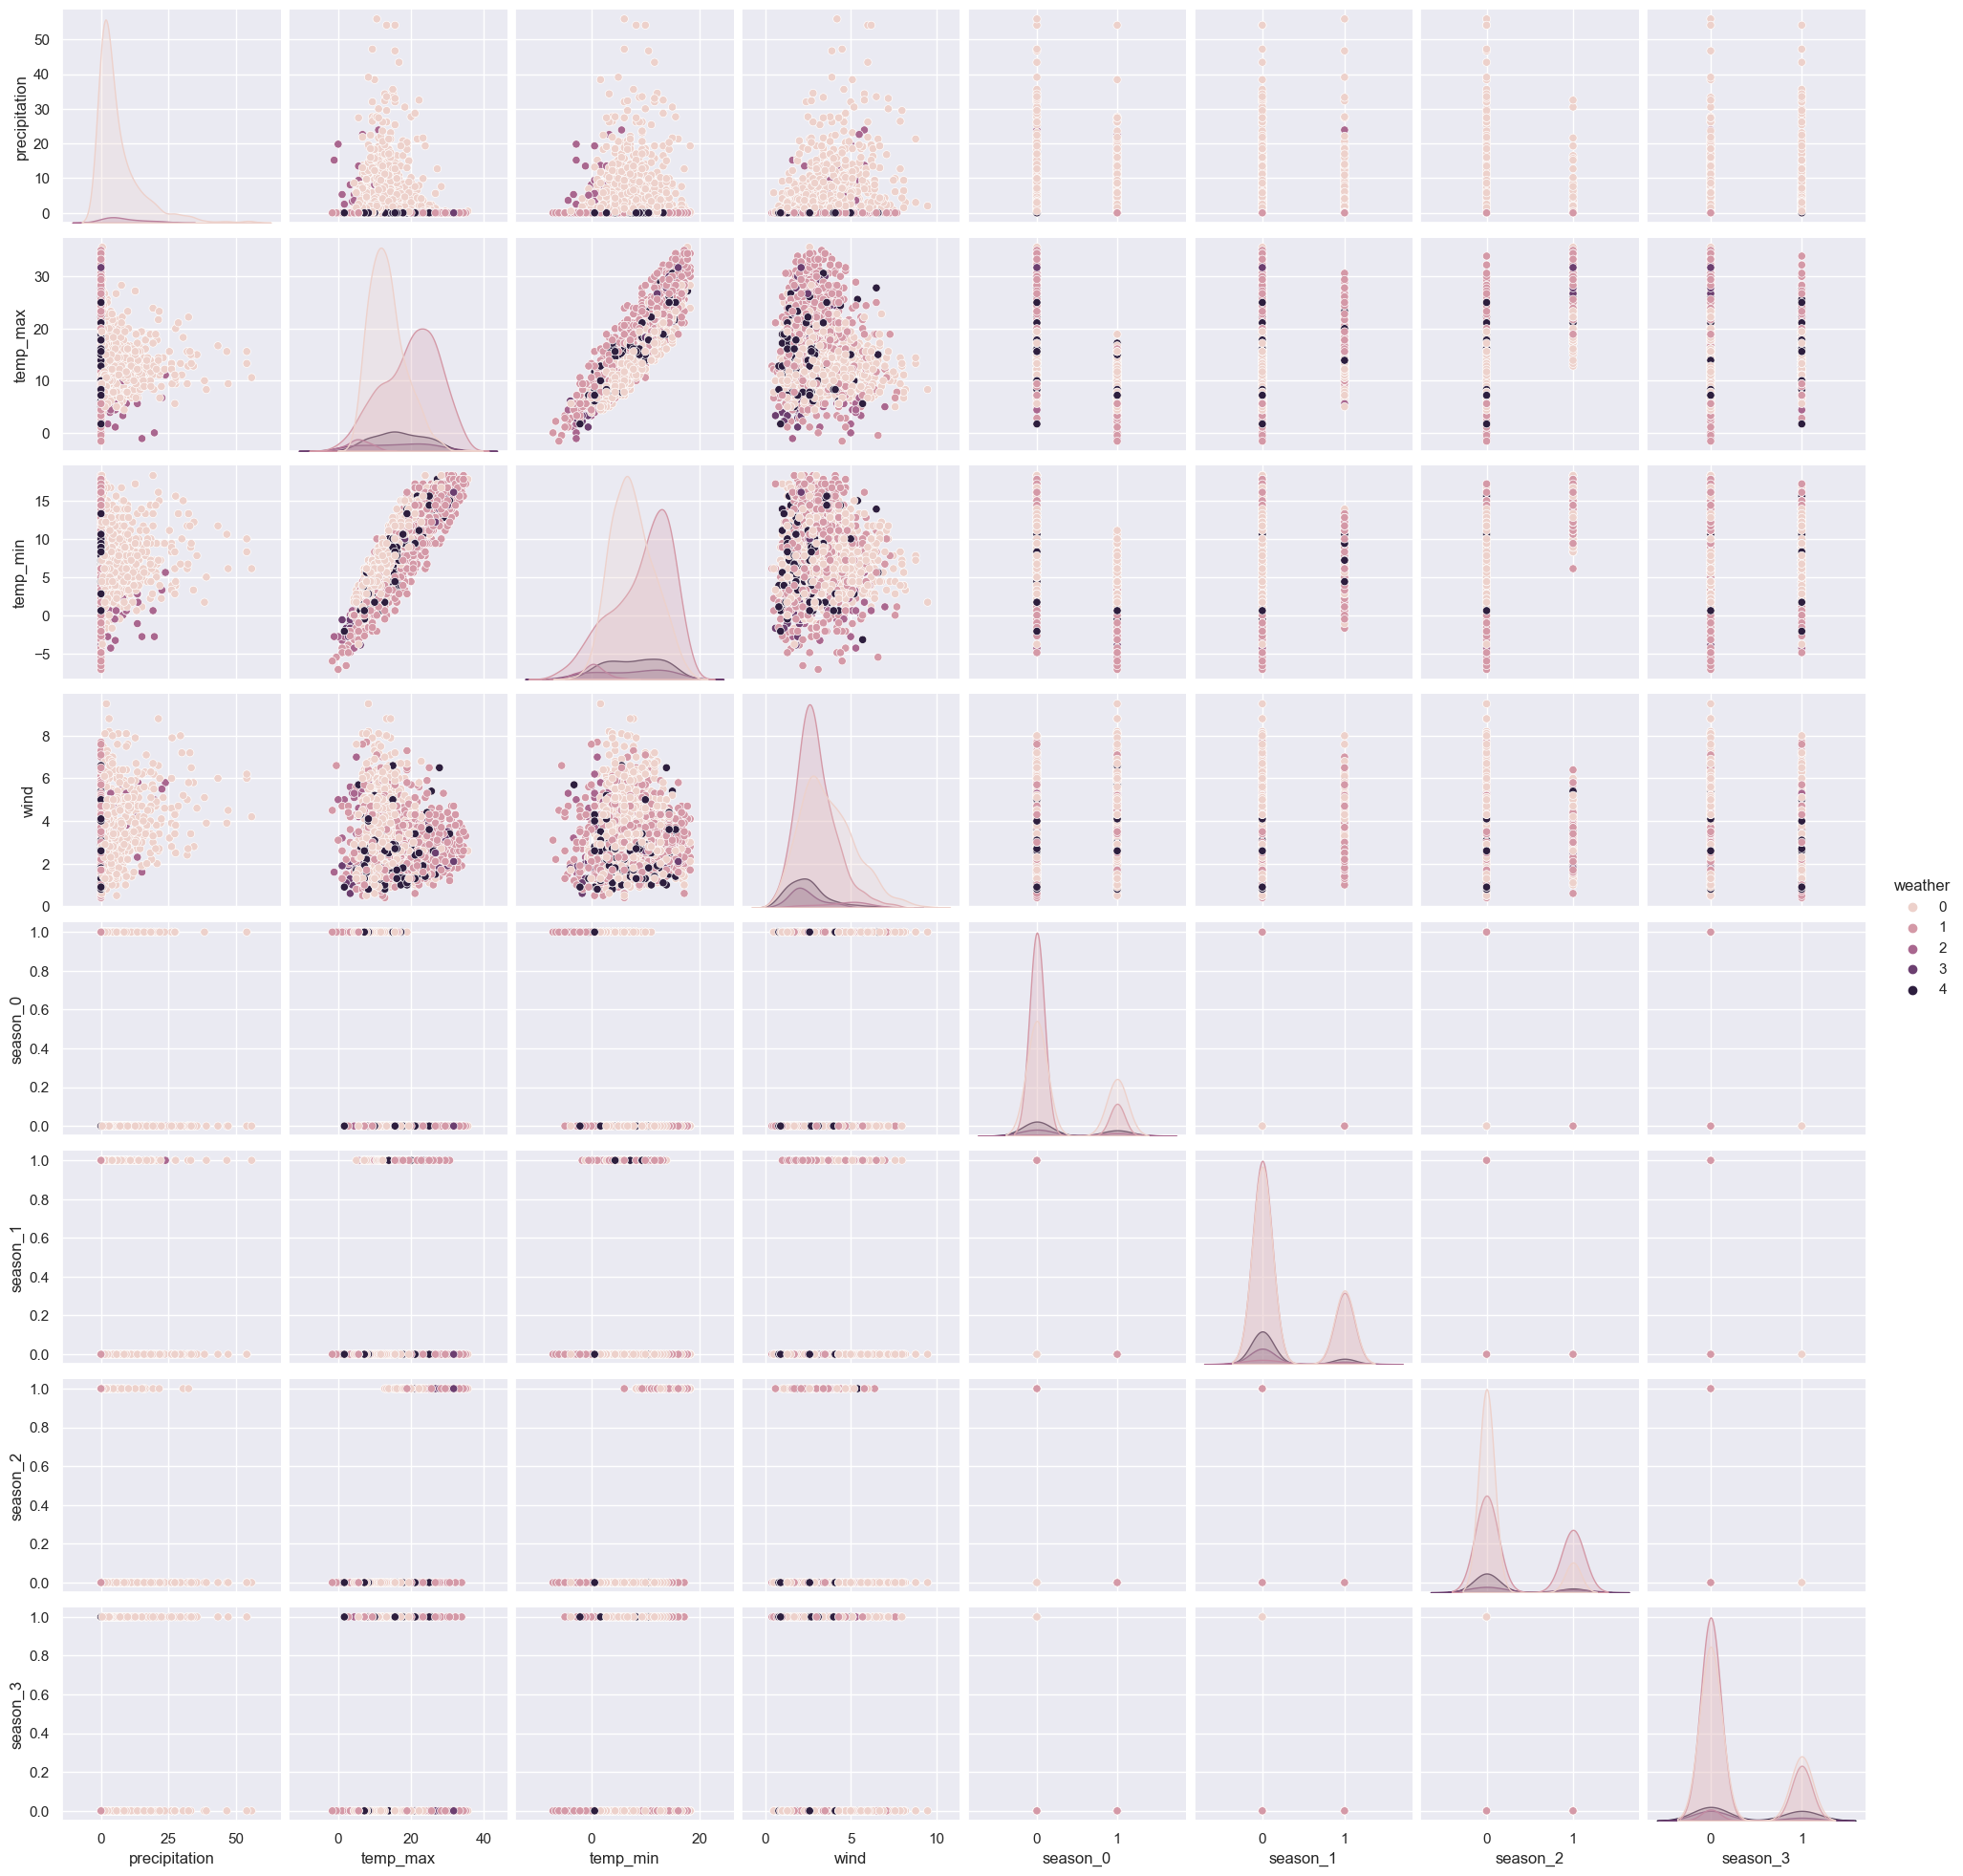

In [34]:
sns.pairplot(weather, 
             vars=['precipitation', 'temp_max', 'temp_min', 'wind', 'season_0', 'season_1', 'season_2', 'season_3'],
             hue='weather')
plt.show()

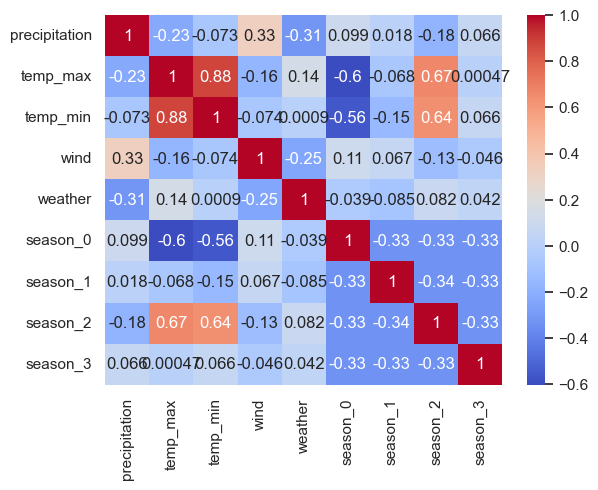

In [35]:
sns.heatmap(weather.corr(), annot=True, cmap='coolwarm')
plt.show()

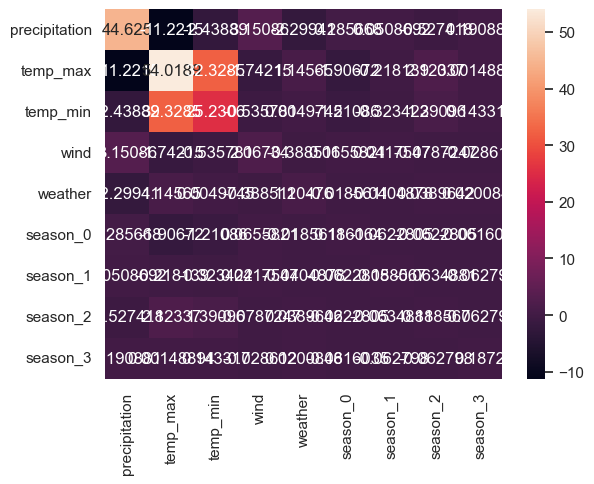

In [36]:
cov_matrix = pd.DataFrame.cov(weather)
sns.heatmap(cov_matrix, annot=True, fmt='g')
plt.show()

In [37]:
cov_matrix = weather.cov()
print(cov_matrix)

               precipitation   temp_max   temp_min      wind   weather  \
precipitation      44.624996 -11.221541  -2.438887  3.150857 -2.299409   
temp_max          -11.221541  54.018944  32.328483 -1.742150  1.145651   
temp_min           -2.438887  32.328483  25.230571 -0.535781  0.004974   
wind                3.150857  -1.742150  -0.535781  2.067341 -0.388511   
weather            -2.299409   1.145651   0.004974 -0.388511  1.204763   
season_0            0.285668  -1.906718  -1.210858  0.065582 -0.018561   
season_1            0.050869  -0.218139  -0.323422  0.041755 -0.040488   
season_2           -0.527418   2.123368   1.390962 -0.078725  0.038964   
season_3            0.190881   0.001489   0.143317 -0.028612  0.020085   

               season_0  season_1  season_2  season_3  
precipitation  0.285668  0.050869 -0.527418  0.190881  
temp_max      -1.906718 -0.218139  2.123368  0.001489  
temp_min      -1.210858 -0.323422  1.390962  0.143317  
wind           0.065582  0.041755 -

# Train the Classifier

### Split dataset to train and test

In [38]:
x = weather.drop('weather',axis=1)
y = weather['weather']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, shuffle=True)

In [39]:
kmeans = KMeans(n_clusters=5, random_state=0) 
kmeans.fit(x)

KMeans(n_clusters=5, random_state=0)

Text(0.5, 0.92, '3D Cluster Plot')

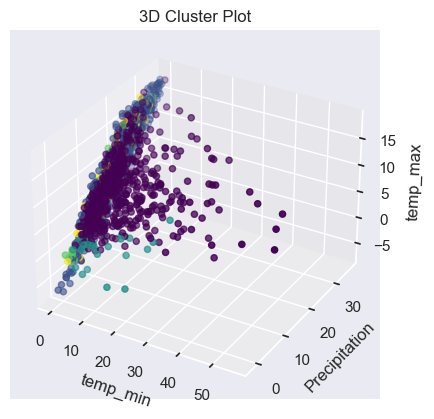

In [42]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x.iloc[:,0], x.iloc[:,1], x.iloc[:,2], c=y, cmap='viridis')
ax.set_ylabel('Precipitation')
ax.set_zlabel('temp_max')
ax.set_xlabel('temp_min')
plt.title("3D Cluster Plot")

Text(0.5, 0.92, '3D Cluster Plot')

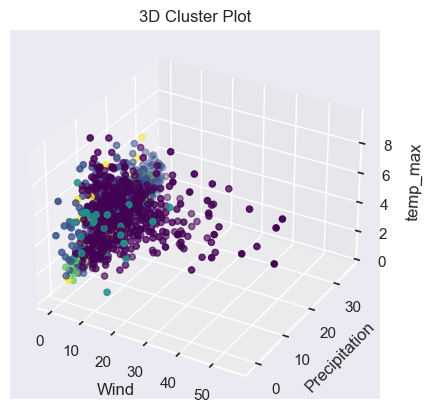

In [44]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x.iloc[:,0], x.iloc[:,1], x.iloc[:,3], c=y, cmap='viridis')
ax.set_ylabel('Precipitation')
ax.set_zlabel('temp_max')
ax.set_xlabel('Wind')
plt.title("3D Cluster Plot")

#### 1- Decision Tree Classifier

In [45]:
dt_classifier = DecisionTreeClassifier(random_state = 0)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [46]:
dt_pred_test = dt_classifier.predict(x_test)
print("Test Features Expected Classification")
print(y_test)
print("Prediction")
print(dt_pred_test)

Test Features Expected Classification
1003    1
611     0
733     0
703     1
900     0
       ..
630     0
1080    1
624     0
52      0
1314    1
Name: weather, Length: 293, dtype: int64
Prediction
[1 0 0 1 0 0 4 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 4 0 0 0
 0 4 1 1 1 1 1 0 0 1 0 0 4 1 1 0 0 0 0 2 1 3 4 0 0 0 1 0 1 0 2 4 0 1 0 4 1
 1 0 0 3 0 1 1 0 1 3 0 1 0 0 1 1 1 1 0 1 3 1 0 1 0 1 1 0 0 4 0 1 1 1 0 0 1
 2 1 0 3 1 1 3 0 0 1 0 0 0 0 3 0 1 0 0 0 3 1 0 0 3 0 1 1 1 0 1 0 1 0 0 0 1
 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 3 0 1 1 4 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 4
 0 0 0 1 0 2 1 0 0 1 1 0 1 3 0 0 0 0 0 1 0 1 1 0 1 1 1 4 0 1 3 0 1 0 1 1 0
 0 1 0 4 1 0 0 1 0 0 4 0 3 1 4 1 0 1 0 0 0 0 0 1 0 1 1 4 1 1 0 1 0 1 1 1 3
 1 4 1 1 1 1 1 1 0 1 4 1 3 0 1 0 1 1 1 0 1 0 1 1 0 1 1 4 0 0 0 0 0 1]


In [47]:
dt_pred_train = dt_classifier.predict(x_train)
print("Train Features Expected Classification")
print(y_train)
print("Prediction")
print(dt_pred_train)

Train Features Expected Classification
74      2
912     1
315     0
123     0
502     0
       ..
1395    4
1078    4
1449    0
150     0
724     1
Name: weather, Length: 1168, dtype: int64
Prediction
[2 1 0 ... 0 0 1]


Confusion Matrix

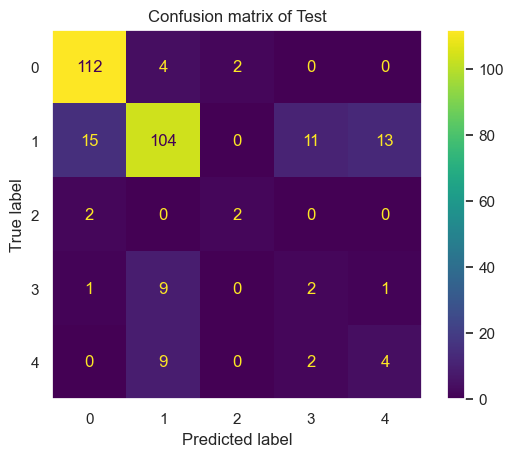

In [48]:
dt_cm_test = metrics.confusion_matrix(y_test, dt_pred_test)
dt_cm_test_display = metrics.ConfusionMatrixDisplay(confusion_matrix = dt_cm_test)
dt_cm_test_display.plot()
plt.title("Confusion matrix of Test")
plt.grid(None)
plt.show() 

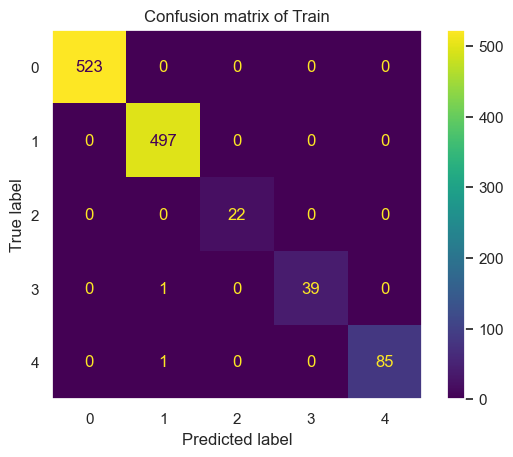

In [49]:
dt_cm_train = metrics.confusion_matrix(y_train, dt_pred_train)
dt_cm_train_display = metrics.ConfusionMatrixDisplay(confusion_matrix = dt_cm_train)
dt_cm_train_display.plot()
plt.title("Confusion matrix of Train")
plt.grid(None)
plt.show() 

Accuracy - Precision - Recall - F-1 Score

In [50]:
dt_accuracy_test = metrics.accuracy_score(y_test, dt_pred_test)
print('Test accuracy:')
print(dt_accuracy_test)

dt_accuracy_train = metrics.accuracy_score(y_train, dt_pred_train)
print('Train accuracy:')
print(dt_accuracy_train)

print("----------------------")

dt_precision_test = metrics.precision_score(y_test, dt_pred_test, average='weighted')
print('Test precision:')
print(dt_precision_test)

dt_precision_train = metrics.precision_score(y_train, dt_pred_train, average='weighted')
print('Train precision:')
print(dt_precision_train)

print("----------------------")

dt_recall_test = metrics.recall_score(y_test, dt_pred_test, average='weighted')
print('Test recall:')
print(dt_recall_test)

dt_recall_train = metrics.recall_score(y_train, dt_pred_train, average='weighted')
print('Train recall:')
print(dt_recall_train)

print("----------------------")

dt_f1_score_test = metrics.f1_score(y_test, dt_pred_test, average='weighted')
print('Test f1 score:')
print(dt_f1_score_test)

dt_f1_score_train = metrics.f1_score(y_train, dt_pred_train, average='weighted')
print('Train f1 score:')
print(dt_f1_score_train)

Test accuracy:
0.764505119453925
Train accuracy:
0.9982876712328768
----------------------
Test precision:
0.7739247479861814
Train precision:
0.9982945342740274
----------------------
Test recall:
0.764505119453925
Train recall:
0.9982876712328768
----------------------
Test f1 score:
0.766712089969681
Train f1 score:
0.9982814682719147


Classification Report

In [51]:
print("Classification Report of Test: ")
print(classification_report(y_test, dt_pred_test))

print("----------------------")

print("Classification Report of Train: ")
print(classification_report(y_train, dt_pred_train))

Classification Report of Test: 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       118
           1       0.83      0.73      0.77       143
           2       0.50      0.50      0.50         4
           3       0.13      0.15      0.14        13
           4       0.22      0.27      0.24        15

    accuracy                           0.76       293
   macro avg       0.51      0.52      0.51       293
weighted avg       0.77      0.76      0.77       293

----------------------
Classification Report of Train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       523
           1       1.00      1.00      1.00       497
           2       1.00      1.00      1.00        22
           3       1.00      0.97      0.99        40
           4       1.00      0.99      0.99        86

    accuracy                           1.00      1168
   macro avg       1.00      0.99      1.00

### Using Post Pruning To Prevent Overfitting

PS: ccp_alpha is the parameter that controls post pruning. The aim is to find the right value of ccp_alpha.

c:\Users\elado\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\elado\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


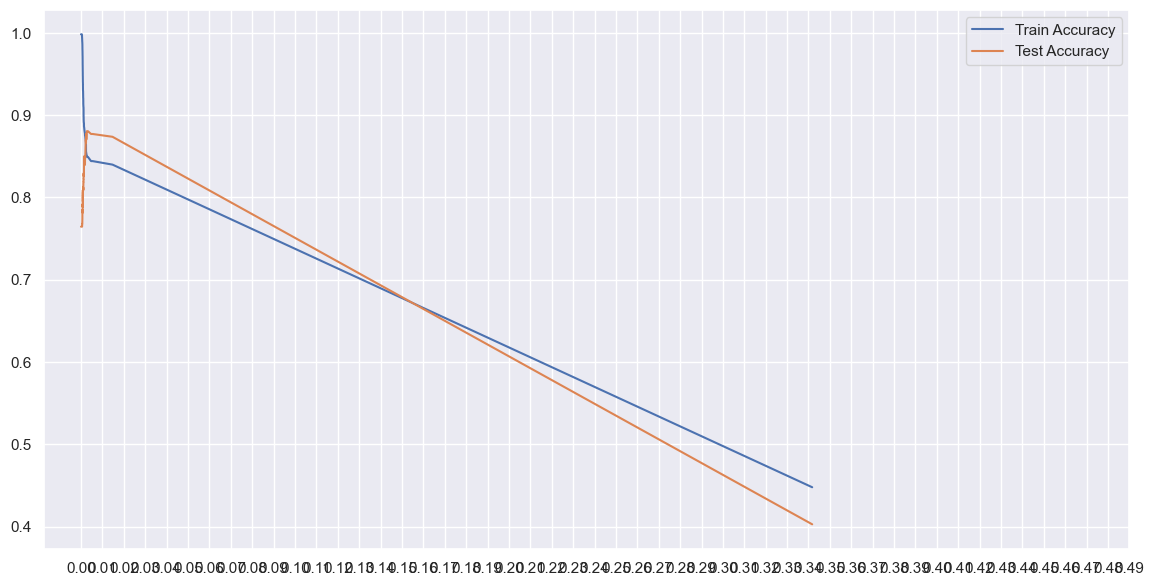

In [52]:
tree_path = dt_classifier.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = tree_path.ccp_alphas, tree_path.impurities

train_accuracy = []
test_accuracy = []
for ccp_alpha in ccp_alphas:
    dt_classifier_2 = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dt_classifier_2.fit(x_train, y_train)
    
    dt_y_train_pred = dt_classifier_2.predict(x_train)
    dt_y_test_pred = dt_classifier_2.predict(x_test)
    train_accuracy.append(metrics.accuracy_score(dt_y_train_pred,y_train))
    test_accuracy.append(metrics.accuracy_score(dt_y_test_pred,y_test))

sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=train_accuracy, x=ccp_alphas, label="Train Accuracy")
sns.lineplot(y=test_accuracy, x=ccp_alphas, label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00, 0.5, 0.01))
plt.show()

As we can see from the graph, choosing ccp_alpha = 0.005 is the best choice.

In [53]:
dt_classifier_final = DecisionTreeClassifier(random_state=0,ccp_alpha=0.005)
dt_classifier_final.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.005, random_state=0)

In [54]:
dt_pred_test_final = dt_classifier_final.predict(x_test)
print("Test Features Expected Classification")
print(y_test)
print("Prediction")
print(dt_pred_test_final)

Test Features Expected Classification
1003    1
611     0
733     0
703     1
900     0
       ..
630     0
1080    1
624     0
52      0
1314    1
Name: weather, Length: 293, dtype: int64
Prediction
[1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0
 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 2 1 1 1 0 0 1 1 0 1 0 2 1 0 1 0 1 1
 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1
 2 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1
 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 2 0 1 1
 0 0 0 1 0 2 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0
 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1]


In [55]:
dt_pred_train_final = dt_classifier_final.predict(x_train)
print("Train Features Expected Classification")
print(y_train)
print("Prediction")
print(dt_pred_train_final)

Train Features Expected Classification
74      2
912     1
315     0
123     0
502     0
       ..
1395    4
1078    4
1449    0
150     0
724     1
Name: weather, Length: 1168, dtype: int64
Prediction
[0 1 0 ... 0 0 1]


#### Results

Confusion Matrix

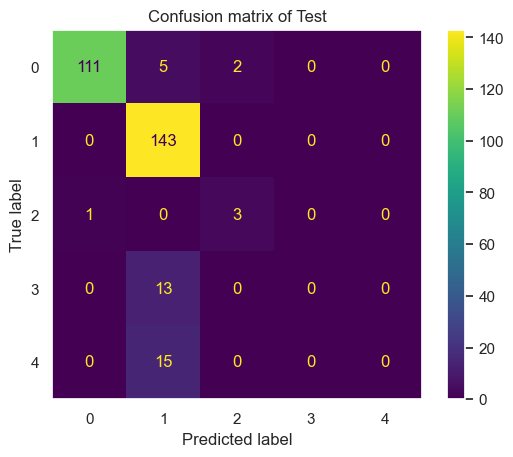

In [56]:
dt_cm_test_postpruning = metrics.confusion_matrix(y_test, dt_pred_test_final)
dt_cm_test_display_postpruning = metrics.ConfusionMatrixDisplay(confusion_matrix = dt_cm_test_postpruning)
dt_cm_test_display_postpruning.plot()
plt.title("Confusion matrix of Test")
plt.grid(None)
plt.show() 

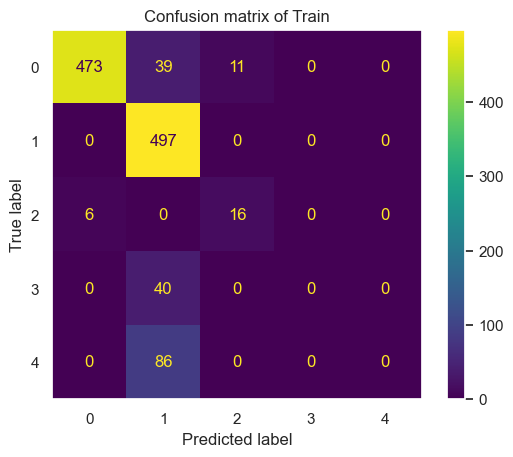

In [57]:
dt_cm_train_postpruning = metrics.confusion_matrix(y_train, dt_pred_train_final)
dt_cm_train_display_postpruning = metrics.ConfusionMatrixDisplay(confusion_matrix = dt_cm_train_postpruning)
dt_cm_train_display_postpruning.plot()
plt.title("Confusion matrix of Train")
plt.grid(None)
plt.show() 

Accuracy - Precision - Recall - F-1 Score

In [58]:
dt_accuracy_test_postpruning = metrics.accuracy_score(y_test, dt_pred_test_final)
print('Test accuracy:')
print(dt_accuracy_test_postpruning)

dt_accuracy_train_postpruning = metrics.accuracy_score(y_train, dt_pred_train_final)
print('Train accuracy:')
print(dt_accuracy_train_postpruning)

print("----------------------")

dt_precision_test_postpruning = metrics.precision_score(y_test, dt_pred_test_final, average='weighted')
print('Test precision:')
print(dt_precision_test_postpruning)

dt_precision_train_postpruning = metrics.precision_score(y_train, dt_pred_train_final, average='weighted')
print('Train precision:')
print(dt_precision_train_postpruning)

print("----------------------")

dt_recall_test_postpruning = metrics.recall_score(y_test, dt_pred_test_final, average='weighted')
print('Test recall:')
print(dt_recall_test_postpruning)

dt_recall_train_postpruning = metrics.recall_score(y_train, dt_pred_train_final, average='weighted')
print('Train recall:')
print(dt_recall_train_postpruning)

print("----------------------")

dt_f1_score_test_postpruning = metrics.f1_score(y_test, dt_pred_test_final, average='weighted')
print('Test f1 score:')
print(dt_f1_score_test_postpruning)

dt_f1_score_train_postpruning = metrics.f1_score(y_train, dt_pred_train_final, average='weighted')
print('Train f1 score:')
print(dt_f1_score_train_postpruning)

Test accuracy:
0.8771331058020477
Train accuracy:
0.8441780821917808
----------------------
Test precision:
0.8038700633837152
Train precision:
0.7727836185403012
----------------------
Test recall:
0.8771331058020477
Train recall:
0.8441780821917808
----------------------
Test f1 score:
0.8353898136256104
Train f1 score:
0.7999853123691665


c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report

In [59]:
print("Classification Report of Test: ")
print(classification_report(y_test, dt_pred_test_final))

print("----------------------")

print("Classification Report of Train: ")
print(classification_report(y_train, dt_pred_train_final))

Classification Report of Test: 
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       118
           1       0.81      1.00      0.90       143
           2       0.60      0.75      0.67         4
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        15

    accuracy                           0.88       293
   macro avg       0.48      0.54      0.51       293
weighted avg       0.80      0.88      0.84       293

----------------------
Classification Report of Train: 
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       523
           1       0.75      1.00      0.86       497
           2       0.59      0.73      0.65        22
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00        86

    accuracy                           0.84      1168
   macro avg       0.47      0.53      0.49

c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metr

#### 2- Random Forest Classifier

In [60]:
rf = RandomForestClassifier()#n_estimators =40, random_state = 0)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
rf_pred_test = rf.predict(x_test)
print("Test Features Expected Classification")
print(y_test)
print("Prediction")
print(rf_pred_test)

Test Features Expected Classification
1003    1
611     0
733     0
703     1
900     0
       ..
630     0
1080    1
624     0
52      0
1314    1
Name: weather, Length: 293, dtype: int64
Prediction
[1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0
 0 4 1 1 1 1 1 0 0 4 0 0 4 1 1 0 0 0 1 2 1 1 4 0 0 1 1 0 4 0 0 1 0 1 0 1 1
 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1
 0 1 0 3 1 1 3 0 0 1 1 0 0 0 1 0 1 0 0 0 1 3 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1
 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 4 1 1 1 0 1 1 1 0 1 1 1 1 0 0 3 4
 0 0 0 1 0 0 1 0 0 1 1 1 1 3 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 4 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1]


In [62]:
rf_pred_train = rf.predict(x_train)
print("Train Features Expected Classification")
print(y_train)
print("Prediction")
print(rf_pred_train)

Train Features Expected Classification
74      2
912     1
315     0
123     0
502     0
       ..
1395    4
1078    4
1449    0
150     0
724     1
Name: weather, Length: 1168, dtype: int64
Prediction
[2 1 0 ... 0 0 1]


#### Results

Confusion Matrix

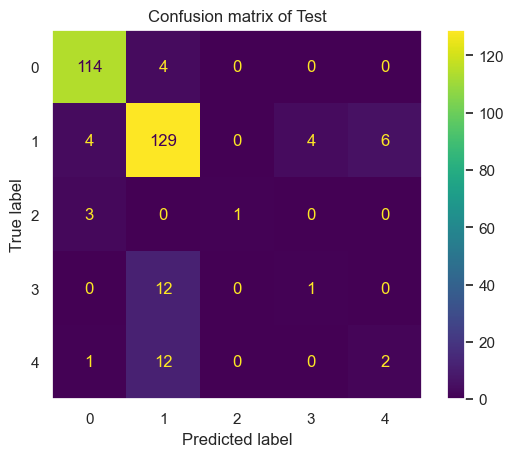

In [63]:
rf_cm_test = metrics.confusion_matrix(y_test, rf_pred_test)
rf_cm_test_display = metrics.ConfusionMatrixDisplay(confusion_matrix = rf_cm_test)
rf_cm_test_display.plot()
plt.title("Confusion matrix of Test")
plt.grid(None)
plt.show() 

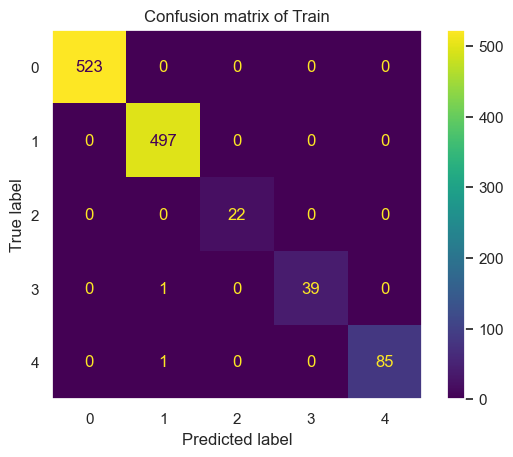

In [64]:
rf_cm_train = metrics.confusion_matrix(y_train, rf_pred_train)
rf_cm_train_display = metrics.ConfusionMatrixDisplay(confusion_matrix = rf_cm_train)
rf_cm_train_display.plot()
plt.title("Confusion matrix of Train")
plt.grid(None)
plt.show() 

Accuracy - Precision - Recall - F-1 Score

In [65]:
rf_accuracy_test = metrics.accuracy_score(y_test, rf_pred_test)
print('Test accuracy:')
print(rf_accuracy_test)

rf_accuracy_train = metrics.accuracy_score(y_train, rf_pred_train)
print('Train accuracy:')
print(rf_accuracy_train)

print("----------------------")

rf_precision_test = metrics.precision_score(y_test, rf_pred_test, average='weighted')
print('Test precision:')
print(rf_precision_test)

rf_precision_train = metrics.precision_score(y_train, rf_pred_train, average='weighted')
print('Train precision:')
print(rf_precision_train)

print("----------------------")

rf_recall_test = metrics.recall_score(y_test, rf_pred_test, average='weighted')
print('Test recall:')
print(rf_recall_test)

rf_recall_train = metrics.recall_score(y_train, rf_pred_train, average='weighted')
print('Train recall:')
print(rf_recall_train)

print("----------------------")

rf_f1_score_test = metrics.f1_score(y_test, rf_pred_test, average='weighted')
print('Test f1 score:')
print(rf_f1_score_test)

rf_f1_score_train = metrics.f1_score(y_train, rf_pred_train, average='weighted')
print('Train f1 score:')
print(rf_f1_score_train)

Test accuracy:
0.8430034129692833
Train accuracy:
0.9982876712328768
----------------------
Test precision:
0.8126590797562848
Train precision:
0.9982945342740274
----------------------
Test recall:
0.8430034129692833
Train recall:
0.9982876712328768
----------------------
Test f1 score:
0.8216148126164449
Train f1 score:
0.9982814682719147


Classification Report

In [66]:
print("Classification Report of Test: ")
print(classification_report(y_test, rf_pred_test))

print("----------------------")

print("Classification Report of Train: ")
print(classification_report(y_train, rf_pred_train))

Classification Report of Test: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       118
           1       0.82      0.90      0.86       143
           2       1.00      0.25      0.40         4
           3       0.20      0.08      0.11        13
           4       0.25      0.13      0.17        15

    accuracy                           0.84       293
   macro avg       0.64      0.47      0.50       293
weighted avg       0.81      0.84      0.82       293

----------------------
Classification Report of Train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       523
           1       1.00      1.00      1.00       497
           2       1.00      1.00      1.00        22
           3       1.00      0.97      0.99        40
           4       1.00      0.99      0.99        86

    accuracy                           1.00      1168
   macro avg       1.00      0.99      1.00

### Feature Scaling

In [67]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### 3- SVM

In [68]:
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

Prediction

In [69]:
svm_pred_test = svm.predict(x_test)
print("Test Features Expected Classification")
print(y_test)
print("Prediction")
print(svm_pred_test)

Test Features Expected Classification
1003    1
611     0
733     0
703     1
900     0
       ..
630     0
1080    1
624     0
52      0
1314    1
Name: weather, Length: 293, dtype: int64
Prediction
[1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0
 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1
 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1
 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1
 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0
 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1]


In [70]:
svm_pred_train = svm.predict(x_train)
print("Train Features Expected Classification")
print(y_train)
print("Prediction")
print(svm_pred_train)

Train Features Expected Classification
74      2
912     1
315     0
123     0
502     0
       ..
1395    4
1078    4
1449    0
150     0
724     1
Name: weather, Length: 1168, dtype: int64
Prediction
[0 1 0 ... 0 1 1]


Confusion Matrix

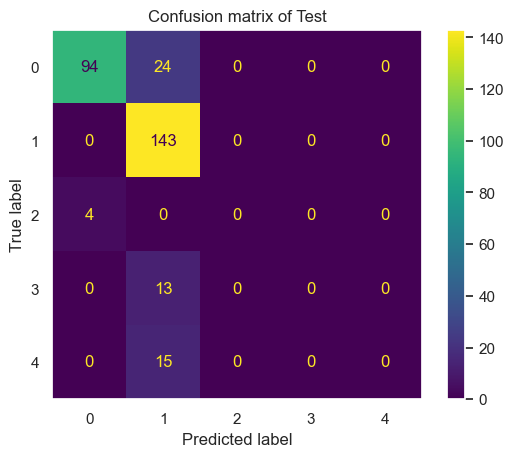

In [71]:
svm_cm_test = metrics.confusion_matrix(y_test, svm_pred_test)
svm_cm_test_display = metrics.ConfusionMatrixDisplay(confusion_matrix = svm_cm_test)
svm_cm_test_display.plot()
plt.title("Confusion matrix of Test")
plt.grid(None)
plt.show() 

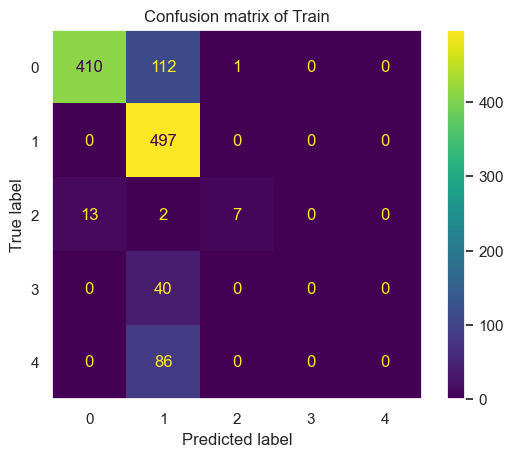

In [72]:
svm_cm_train = metrics.confusion_matrix(y_train, svm_pred_train)
svm_cm_train_display = metrics.ConfusionMatrixDisplay(confusion_matrix = svm_cm_train)
svm_cm_train_display.plot()
plt.title("Confusion matrix of Train")
plt.grid(None)
plt.show() 

Accuracy - Precision - Recall - F-1 Score

In [73]:
svm_accuracy_test = metrics.accuracy_score(y_test, svm_pred_test)
print('Test accuracy:')
print(svm_accuracy_test)

svm_accuracy_train = metrics.accuracy_score(y_train, svm_pred_train)
print('Train accuracy:')
print(svm_accuracy_train)

print("----------------------")

svm_precision_test = metrics.precision_score(y_test, svm_pred_test, average='weighted')
print('Test precision:')
print(svm_precision_test)

svm_precision_train = metrics.precision_score(y_train, svm_pred_train, average='weighted')
print('Train precision:')
print(svm_precision_train)

print("----------------------")

svm_recall_test = metrics.recall_score(y_test, svm_pred_test, average='weighted')
print('Test recall:')
print(svm_recall_test)

svm_recall_train = metrics.recall_score(y_train, svm_pred_train, average='weighted')
print('Train recall:')
print(svm_recall_train)

print("----------------------")

svm_f1_score_test = metrics.f1_score(y_test, svm_pred_test, average='weighted')
print('Test f1 score:')
print(svm_f1_score_test)

svm_f1_score_train = metrics.f1_score(y_train, svm_pred_train, average='weighted')
print('Train f1 score:')
print(svm_f1_score_train)

Test accuracy:
0.8088737201365188
Train accuracy:
0.7825342465753424
----------------------
Test precision:
0.7441991130923359
Train precision:
0.7374412629175909
----------------------
Test recall:
0.8088737201365188
Train recall:
0.7825342465753424
----------------------
Test f1 score:
0.763493869295917
Train f1 score:
0.7396796087626936


c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report

In [74]:
print("Classification Report of Test: ")
print(classification_report(y_test, svm_pred_test))

print("----------------------")

print("Classification Report of Train: ")
print(classification_report(y_train, svm_pred_train))

Classification Report of Test: 
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       118
           1       0.73      1.00      0.85       143
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        15

    accuracy                           0.81       293
   macro avg       0.34      0.36      0.34       293
weighted avg       0.74      0.81      0.76       293

----------------------
Classification Report of Train: 
              precision    recall  f1-score   support

           0       0.97      0.78      0.87       523
           1       0.67      1.00      0.81       497
           2       0.88      0.32      0.47        22
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00        86

    accuracy                           0.78      1168
   macro avg       0.50      0.42      0.43

c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metr

### Using K-Fold Cross Validation

In [75]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score, average='weighted'),
           'recall' : make_scorer(recall_score, average='weighted'), 
           'f1_score' : make_scorer(f1_score, average='weighted'),
           }

In [76]:
kfold_cross_val_svm = KFold(n_splits=10)
kfold_svm = SVC(kernel = 'linear', random_state = 0)
results_kfold_svm = cross_validate(kfold_svm, x, y, cv=kfold_cross_val_svm, scoring=scoring)

print(np.mean(results_kfold_svm['test_f1_score'])) 

c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedM

0.804573471375312


c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 4- K-Nearest Neighbors (K-NN) 

In [77]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [78]:
knn_pred_test = knn.predict(x_test)
print("Test Features Expected Classification")
print(y_test)
print("Prediction")
print(knn_pred_test)

Test Features Expected Classification
1003    1
611     0
733     0
703     1
900     0
       ..
630     0
1080    1
624     0
52      0
1314    1
Name: weather, Length: 293, dtype: int64
Prediction
[1 1 0 3 1 0 4 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0
 0 1 1 1 1 1 1 0 0 4 0 0 0 1 1 0 0 0 0 1 1 1 4 1 0 1 1 0 1 0 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1
 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 4 1
 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 4 1 1 1 1 1 1 1 2 1 1 1 1 0 0 1 1
 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0
 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 4 1 0 1 0 1 1 1 0 1 0 0 1 1 1
 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1]


c:\Users\elado\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [79]:
knn_pred_train = knn.predict(x_train)
print("Train Features Expected Classification")
print(y_train)
print("Prediction")
print(knn_pred_train)

c:\Users\elado\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train Features Expected Classification
74      2
912     1
315     0
123     0
502     0
       ..
1395    4
1078    4
1449    0
150     0
724     1
Name: weather, Length: 1168, dtype: int64
Prediction
[0 1 0 ... 0 0 1]


Confusion Matrix

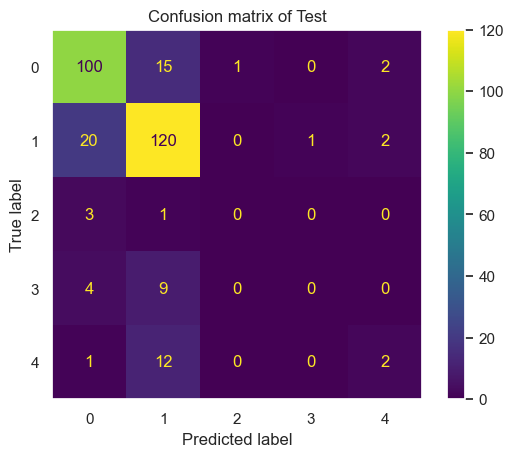

In [80]:
knn_cm_test = metrics.confusion_matrix(y_test, knn_pred_test)
knn_cm_test_display = metrics.ConfusionMatrixDisplay(confusion_matrix = knn_cm_test)
knn_cm_test_display.plot()
plt.title("Confusion matrix of Test")
plt.grid(None)
plt.show() 

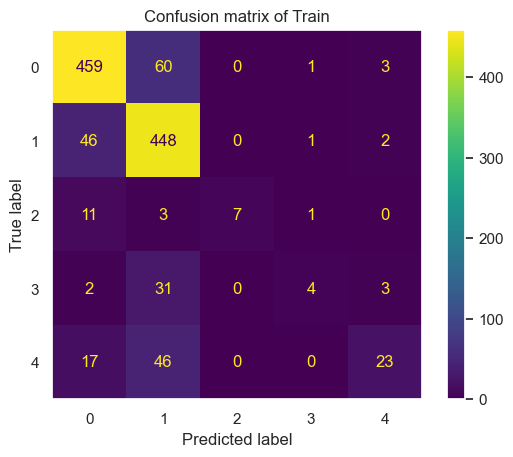

In [81]:
knn_cm_train = metrics.confusion_matrix(y_train, knn_pred_train)
knn_cm_train_display = metrics.ConfusionMatrixDisplay(confusion_matrix = knn_cm_train)
knn_cm_train_display.plot()
plt.title("Confusion matrix of Train")
plt.grid(None)
plt.show() 

Accuracy - Precision - Recall - F-1 Score

In [82]:
knn_accuracy_test = metrics.accuracy_score(y_test, knn_pred_test)
print('Test accuracy:')
print(knn_accuracy_test)

knn_accuracy_train = metrics.accuracy_score(y_train, knn_pred_train)
print('Train accuracy:')
print(knn_accuracy_train)

print("----------------------")

knn_precision_test = metrics.precision_score(y_test, knn_pred_test, average='weighted')
print('Test precision:')
print(knn_precision_test)

knn_precision_train = metrics.precision_score(y_train, knn_pred_train, average='weighted')
print('Train precision:')
print(knn_precision_train)

print("----------------------")

knn_recall_test = metrics.recall_score(y_test, knn_pred_test, average='weighted')
print('Test recall:')
print(knn_recall_test)

knn_recall_train = metrics.recall_score(y_train, knn_pred_train, average='weighted')
print('Train recall:')
print(knn_recall_train)

print("----------------------")

knn_f1_score_test = metrics.f1_score(y_test, knn_pred_test, average='weighted')
print('Test f1 score:')
print(knn_f1_score_test)

knn_f1_score_train = metrics.f1_score(y_train, knn_pred_train, average='weighted')
print('Train f1 score:')
print(knn_f1_score_train)

Test accuracy:
0.757679180887372
Train accuracy:
0.8056506849315068
----------------------
Test precision:
0.7047333210147606
Train precision:
0.8013997722893056
----------------------
Test recall:
0.757679180887372
Train recall:
0.8056506849315068
----------------------
Test f1 score:
0.7276180962687246
Train f1 score:
0.7837850371641358


Classification Report

In [83]:
print("Classification Report of Test: ")
print(classification_report(y_test, knn_pred_test))

print("----------------------")

print("Classification Report of Train: ")
print(classification_report(y_train, knn_pred_train))

Classification Report of Test: 
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       118
           1       0.76      0.84      0.80       143
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        13
           4       0.33      0.13      0.19        15

    accuracy                           0.76       293
   macro avg       0.38      0.36      0.36       293
weighted avg       0.70      0.76      0.73       293

----------------------
Classification Report of Train: 
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       523
           1       0.76      0.90      0.83       497
           2       1.00      0.32      0.48        22
           3       0.57      0.10      0.17        40
           4       0.74      0.27      0.39        86

    accuracy                           0.81      1168
   macro avg       0.79      0.49      0.55

### Using K-Fold Cross Validation

In [84]:
results_kfold_knn = []
best_result = 0
for j in range(1, 50):
    kfold_cross_val_knn = KFold(n_splits=10)
    kfold_knn = KNeighborsClassifier(n_neighbors = j)
    results_kfold_knn = cross_validate(kfold_knn, x, y, cv=kfold_cross_val_knn, scoring=scoring)
    result_f1_mean = np.mean(results_kfold_knn['test_f1_score'])
    if best_result < result_f1_mean:
        best_kfold_knn = results_kfold_knn
        best_result = result_f1_mean
        best_n = j
    
kfold_knn_f1 = best_result
print("Best result: " + str(best_result))
print("Best n: " + str(best_n))

c:\Users\elado\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), 

c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.

Best result: 0.7110112651515978
Best n: 4


c:\Users\elado\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurt

#### 5- Logistic Regression 

In [85]:
logistic_reg = LogisticRegression(random_state = 0)
logistic_reg.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [86]:
lr_pred_test = logistic_reg.predict(x_test)
print("Test Features Expected Classification")
print(y_test)
print("Prediction")
print(lr_pred_test)

Test Features Expected Classification
1003    1
611     0
733     0
703     1
900     0
       ..
630     0
1080    1
624     0
52      0
1314    1
Name: weather, Length: 293, dtype: int64
Prediction
[1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0
 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 2 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1
 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1
 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1]


In [87]:
lr_pred_train = logistic_reg.predict(x_train)
print("Train Features Expected Classification")
print(y_train)
print("Prediction")
print(lr_pred_train)

Train Features Expected Classification
74      2
912     1
315     0
123     0
502     0
       ..
1395    4
1078    4
1449    0
150     0
724     1
Name: weather, Length: 1168, dtype: int64
Prediction
[0 1 0 ... 0 0 1]


Confusion Matrix

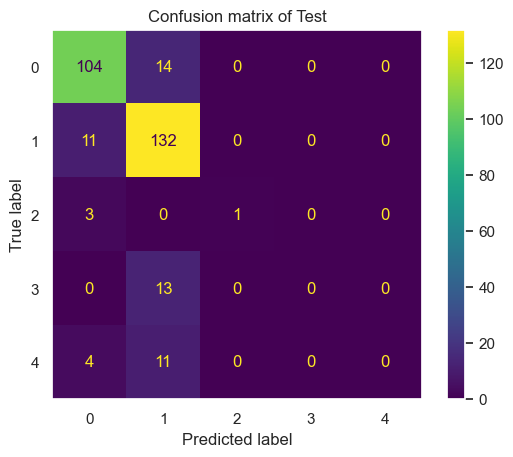

In [88]:
lr_cm_test = metrics.confusion_matrix(y_test, lr_pred_test)
lr_cm_test_display = metrics.ConfusionMatrixDisplay(confusion_matrix = lr_cm_test)
lr_cm_test_display.plot()
plt.title("Confusion matrix of Test")
plt.grid(None)
plt.show() 

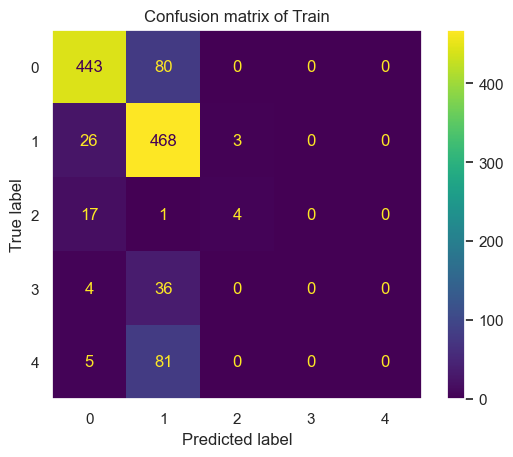

In [89]:
lr_cm_train = metrics.confusion_matrix(y_train, lr_pred_train)
lr_cm_train_display = metrics.ConfusionMatrixDisplay(confusion_matrix = lr_cm_train)
lr_cm_train_display.plot()
plt.title("Confusion matrix of Train")
plt.grid(None)
plt.show() 

Accuracy - Precision - Recall - F-1 Score

In [90]:
lr_accuracy_test = metrics.accuracy_score(y_test, lr_pred_test)
print('Test accuracy:')
print(lr_accuracy_test)

lr_accuracy_train = metrics.accuracy_score(y_train, lr_pred_train)
print('Train accuracy:')
print(lr_accuracy_train)

print("----------------------")

lr_precision_test = metrics.precision_score(y_test, lr_pred_test, average='weighted')
print('Test precision:')
print(lr_precision_test)

lr_precision_train = metrics.precision_score(y_train, lr_pred_train, average='weighted')
print('Train precision:')
print(lr_precision_train)

print("----------------------")

lr_recall_test = metrics.recall_score(y_test, lr_pred_test, average='weighted')
print('Test recall:')
print(lr_recall_test)

lr_recall_train = metrics.recall_score(y_train, lr_pred_train, average='weighted')
print('Train recall:')
print(lr_recall_train)

print("----------------------")

lr_f1_score_test = metrics.f1_score(y_test, lr_pred_test, average='weighted')
print('Test f1 score:')
print(lr_f1_score_test)

lr_f1_score_train = metrics.f1_score(y_train, lr_pred_train, average='weighted')
print('Train f1 score:')
print(lr_f1_score_train)

Test accuracy:
0.8088737201365188
Train accuracy:
0.7833904109589042
----------------------
Test precision:
0.7359230650241408
Train precision:
0.7105079260901178
----------------------
Test recall:
0.8088737201365188
Train recall:
0.7833904109589042
----------------------
Test f1 score:
0.7661436354847034
Train f1 score:
0.737368803587662


c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report

In [91]:
print("Classification Report of Test: ")
print(classification_report(y_test, lr_pred_test))

print("----------------------")

print("Classification Report of Train: ")
print(classification_report(y_train, lr_pred_train))

Classification Report of Test: 
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       118
           1       0.78      0.92      0.84       143
           2       1.00      0.25      0.40         4
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        15

    accuracy                           0.81       293
   macro avg       0.53      0.41      0.42       293
weighted avg       0.74      0.81      0.77       293

----------------------
Classification Report of Train: 
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       523
           1       0.70      0.94      0.80       497
           2       0.57      0.18      0.28        22
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00        86

    accuracy                           0.78      1168
   macro avg       0.43      0.39      0.39

c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metr

### Using K-Fold Cross Validation

In [92]:
kfold_cross_val_lr = KFold(n_splits=10)
kfold_logistic_reg = LogisticRegression(max_iter=1000)
results_kfold_lr = cross_validate(kfold_logistic_reg, x, y, cv=kfold_cross_val_lr, scoring=scoring)

print(np.mean(results_kfold_lr['test_f1_score']))

c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedM

0.8008646406154065


c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Organizing Data to Become a Balanced Dataset

The dataset is unbalanced and because of this, models cannot learn well especially on less exampled data. To overcome this situation, I will oversample the data of the minority classes.  

In [93]:
y = LabelEncoder().fit_transform(y)
oversample = SMOTE()
x_balanced, y_balanced = oversample.fit_resample(x, y)

Class=3, n=641 (43.874%)
Class=0, n=641 (43.874%)
Class=1, n=641 (43.874%)
Class=2, n=641 (43.874%)
Class=4, n=641 (43.874%)


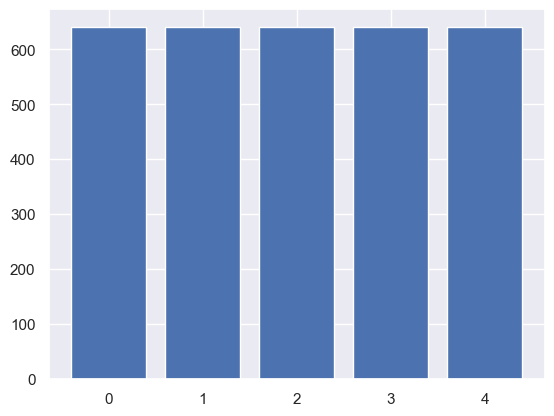

In [94]:
counter = Counter(y_balanced)
for k,v in counter.items():
    per = v/len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Now, I will train new models with the algorithms used before.

### Split dataset to train and test

In [95]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_balanced, y_balanced, test_size = 0.20, shuffle=True)

#### 1- Decision Tree Classifier

In [96]:
dt_classifier_2 = DecisionTreeClassifier(random_state = 0)
dt_classifier_2.fit(x_train_2, y_train_2)

DecisionTreeClassifier(random_state=0)

In [97]:
dt_pred_test_2 = dt_classifier_2.predict(x_test_2)
print("Test Features Expected Classification")
print(y_test_2)
print("Prediction")
print(dt_pred_test_2)

Test Features Expected Classification
[1 2 1 2 4 1 3 2 3 3 4 0 3 4 1 2 1 1 1 4 0 1 4 2 4 4 2 2 2 0 1 1 3 4 4 0 3
 1 4 4 4 1 2 0 0 1 0 4 2 0 4 4 2 2 4 0 1 1 2 0 3 3 3 1 4 4 4 3 3 0 1 3 3 3
 2 3 1 3 3 1 3 3 2 2 2 1 4 4 0 4 2 3 0 0 0 2 4 4 1 4 4 0 1 4 0 1 3 1 4 0 3
 3 4 2 0 1 0 0 0 4 4 0 4 4 0 0 0 0 0 1 1 3 1 3 3 1 4 4 1 3 4 1 4 0 4 3 0 4
 4 4 3 4 1 0 2 3 3 4 0 4 2 0 3 3 0 2 3 4 2 4 1 0 4 3 1 1 0 0 0 4 3 4 3 2 2
 0 1 3 4 2 2 3 2 4 2 2 4 2 0 2 1 3 2 4 4 2 4 0 2 1 0 3 1 4 3 3 0 2 0 1 0 2
 2 1 4 3 3 4 4 2 2 4 4 3 3 2 0 4 1 2 2 0 1 4 4 4 4 2 1 3 0 1 1 3 0 4 3 3 3
 4 0 4 0 1 1 0 3 2 3 1 3 1 0 2 2 0 0 2 0 1 0 2 0 0 4 2 3 0 0 3 1 2 3 2 4 3
 1 0 1 0 0 1 4 0 2 4 2 2 0 2 2 1 2 1 2 2 3 2 0 3 3 0 0 3 4 3 3 0 1 0 2 4 3
 3 2 0 1 2 3 3 1 3 4 1 3 1 2 4 0 4 0 4 1 4 2 0 2 2 3 0 3 3 2 3 3 2 3 4 2 2
 1 0 1 4 4 0 0 1 3 4 0 2 0 3 1 0 2 3 1 0 2 1 2 0 0 3 3 2 4 2 0 4 3 0 0 0 4
 0 0 1 4 2 1 1 4 3 1 0 3 0 3 4 0 0 3 2 2 0 3 4 0 3 3 2 2 4 1 3 2 2 2 1 1 4
 4 3 4 4 4 0 4 1 1 3 2 4 2 0 0 2 0 1 4 1 4 0 1 3 4 4 2 2 1 2 2

In [98]:
dt_pred_train_2 = dt_classifier_2.predict(x_train_2)
print("Train Features Expected Classification")
print(y_train_2)
print("Prediction")
print(dt_pred_train_2)

Train Features Expected Classification
[0 3 3 ... 0 1 3]
Prediction
[0 3 3 ... 0 1 3]


#### Results

Confusion Matrix

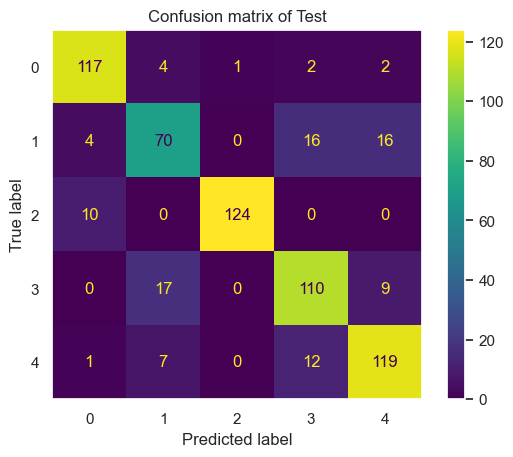

In [99]:
dt_cm_test_2 = metrics.confusion_matrix(y_test_2, dt_pred_test_2)
dt_cm_test_display_2 = metrics.ConfusionMatrixDisplay(confusion_matrix = dt_cm_test_2)
dt_cm_test_display_2.plot()
plt.title("Confusion matrix of Test")
plt.grid(None)
plt.show() 

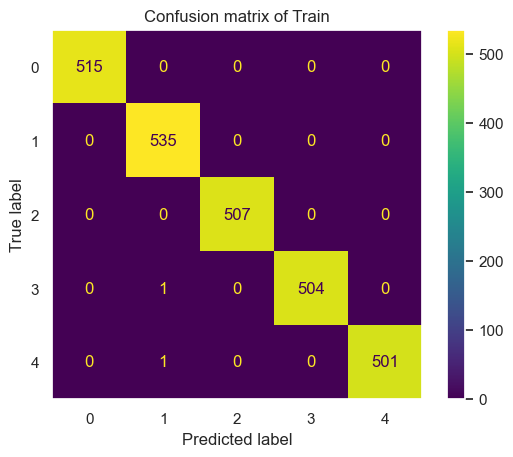

In [100]:
dt_cm_train_2 = metrics.confusion_matrix(y_train_2, dt_pred_train_2)
dt_cm_train_display_2 = metrics.ConfusionMatrixDisplay(confusion_matrix = dt_cm_train_2)
dt_cm_train_display_2.plot()
plt.title("Confusion matrix of Train")
plt.grid(None)
plt.show() 

Accuracy - Precision - Recall - F-1 Score

In [101]:
dt_accuracy_test_2 = metrics.accuracy_score(y_test_2, dt_pred_test_2)
print('Test accuracy:')
print(dt_accuracy_test_2)

dt_accuracy_train_2 = metrics.accuracy_score(y_train_2, dt_pred_train_2)
print('Train accuracy:')
print(dt_accuracy_train_2)

print("----------------------")

dt_precision_test_2 = metrics.precision_score(y_test_2, dt_pred_test_2, average='weighted')
print('Test precision:')
print(dt_precision_test_2)

dt_precision_train_2 = metrics.precision_score(y_train_2, dt_pred_train_2, average='weighted')
print('Train precision:')
print(dt_precision_train_2)

print("----------------------")

dt_recall_test_2 = metrics.recall_score(y_test_2, dt_pred_test_2, average='weighted')
print('Test recall:')
print(dt_recall_test_2)

dt_recall_train_2 = metrics.recall_score(y_train_2, dt_pred_train_2, average='weighted')
print('Train recall:')
print(dt_recall_train_2)

print("----------------------")

dt_f1_score_test_2 = metrics.f1_score(y_test_2, dt_pred_test_2, average='weighted')
print('Test f1 score:')
print(dt_f1_score_test_2)

dt_f1_score_train_2 = metrics.f1_score(y_train_2, dt_pred_train_2, average='weighted')
print('Train f1 score:')
print(dt_f1_score_train_2)

Test accuracy:
0.8424336973478939
Train accuracy:
0.999219968798752
----------------------
Test precision:
0.8431759240268206
Train precision:
0.9992228739428907
----------------------
Test recall:
0.8424336973478939
Train recall:
0.999219968798752
----------------------
Test f1 score:
0.8421467054593499
Train f1 score:
0.9992203087468863


Classification Report

In [102]:
print("Classification Report of Test: ")
print(classification_report(y_test_2, dt_pred_test_2))

print("----------------------")

print("Classification Report of Train: ")
print(classification_report(y_train_2, dt_pred_train_2))

Classification Report of Test: 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       126
           1       0.71      0.66      0.69       106
           2       0.99      0.93      0.96       134
           3       0.79      0.81      0.80       136
           4       0.82      0.86      0.84       139

    accuracy                           0.84       641
   macro avg       0.84      0.84      0.84       641
weighted avg       0.84      0.84      0.84       641

----------------------
Classification Report of Train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       515
           1       1.00      1.00      1.00       535
           2       1.00      1.00      1.00       507
           3       1.00      1.00      1.00       505
           4       1.00      1.00      1.00       502

    accuracy                           1.00      2564
   macro avg       1.00      1.00      1.00

### Using Post Pruning To Prevent Overfitting

c:\Users\elado\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\elado\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


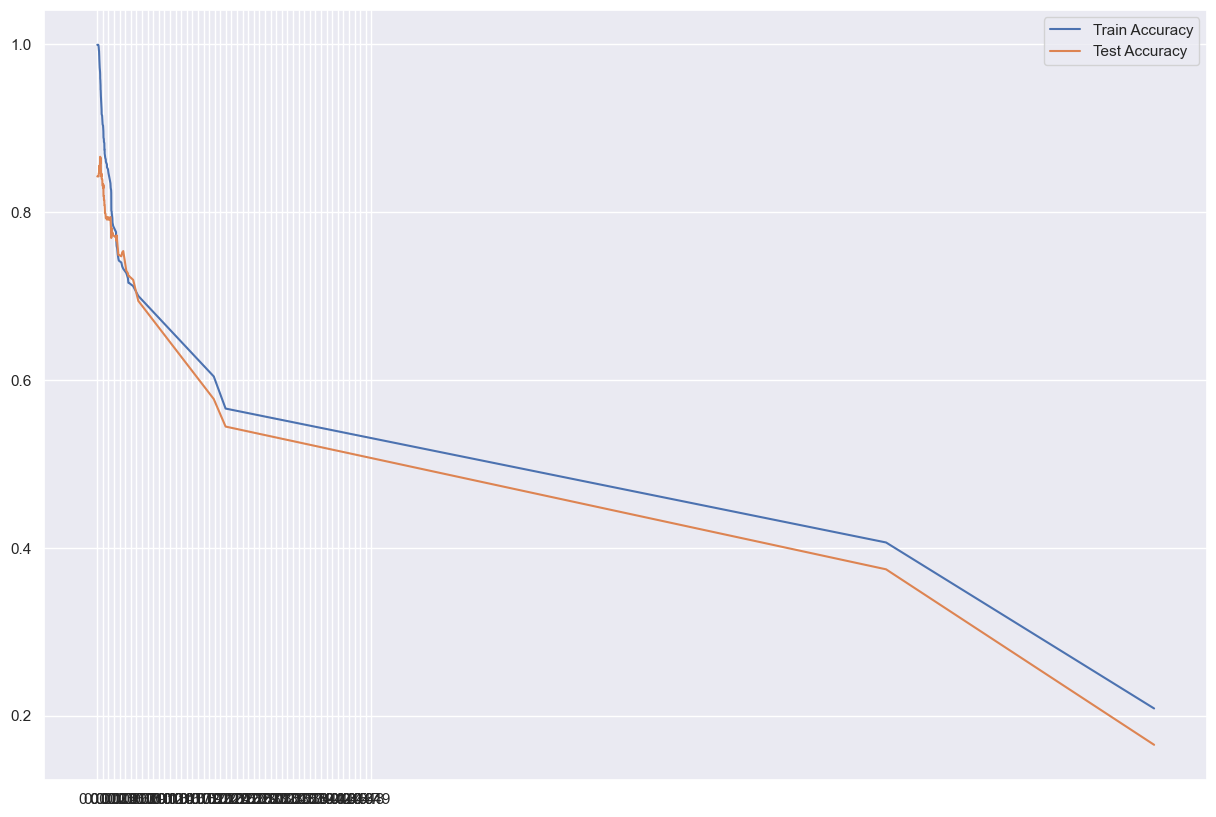

In [103]:
tree_path_2 = dt_classifier_2.cost_complexity_pruning_path(x_train_2, y_train_2)
ccp_alphas_2, impurities_2 = tree_path_2.ccp_alphas, tree_path_2.impurities

train_accuracy_2 = []
test_accuracy_2 = []
for ccp_alpha in ccp_alphas_2:
    dt_classifier_2 = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dt_classifier_2.fit(x_train_2, y_train_2)
    
    dt_y_train_pred_2 = dt_classifier_2.predict(x_train_2)
    dt_y_test_pred_2 = dt_classifier_2.predict(x_test_2)
    train_accuracy_2.append(metrics.accuracy_score(dt_y_train_pred_2,y_train_2))
    test_accuracy_2.append(metrics.accuracy_score(dt_y_test_pred_2,y_test_2))

sns.set()
plt.figure(figsize=(15,10))
sns.lineplot(y=train_accuracy_2, x=ccp_alphas_2, label="Train Accuracy")
sns.lineplot(y=test_accuracy_2, x=ccp_alphas_2, label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00, 0.05, 0.001))
plt.show()

In [104]:
dt_classifier_final_2 = DecisionTreeClassifier(random_state=0,ccp_alpha=0.002)
dt_classifier_final_2.fit(x_train_2,y_train_2)

DecisionTreeClassifier(ccp_alpha=0.002, random_state=0)

In [105]:
dt_pred_test_final_2 = dt_classifier_final_2.predict(x_test_2)
print("Test Features Expected Classification")
print(y_test_2)
print("Prediction")
print(dt_pred_test_final_2)

Test Features Expected Classification
[1 2 1 2 4 1 3 2 3 3 4 0 3 4 1 2 1 1 1 4 0 1 4 2 4 4 2 2 2 0 1 1 3 4 4 0 3
 1 4 4 4 1 2 0 0 1 0 4 2 0 4 4 2 2 4 0 1 1 2 0 3 3 3 1 4 4 4 3 3 0 1 3 3 3
 2 3 1 3 3 1 3 3 2 2 2 1 4 4 0 4 2 3 0 0 0 2 4 4 1 4 4 0 1 4 0 1 3 1 4 0 3
 3 4 2 0 1 0 0 0 4 4 0 4 4 0 0 0 0 0 1 1 3 1 3 3 1 4 4 1 3 4 1 4 0 4 3 0 4
 4 4 3 4 1 0 2 3 3 4 0 4 2 0 3 3 0 2 3 4 2 4 1 0 4 3 1 1 0 0 0 4 3 4 3 2 2
 0 1 3 4 2 2 3 2 4 2 2 4 2 0 2 1 3 2 4 4 2 4 0 2 1 0 3 1 4 3 3 0 2 0 1 0 2
 2 1 4 3 3 4 4 2 2 4 4 3 3 2 0 4 1 2 2 0 1 4 4 4 4 2 1 3 0 1 1 3 0 4 3 3 3
 4 0 4 0 1 1 0 3 2 3 1 3 1 0 2 2 0 0 2 0 1 0 2 0 0 4 2 3 0 0 3 1 2 3 2 4 3
 1 0 1 0 0 1 4 0 2 4 2 2 0 2 2 1 2 1 2 2 3 2 0 3 3 0 0 3 4 3 3 0 1 0 2 4 3
 3 2 0 1 2 3 3 1 3 4 1 3 1 2 4 0 4 0 4 1 4 2 0 2 2 3 0 3 3 2 3 3 2 3 4 2 2
 1 0 1 4 4 0 0 1 3 4 0 2 0 3 1 0 2 3 1 0 2 1 2 0 0 3 3 2 4 2 0 4 3 0 0 0 4
 0 0 1 4 2 1 1 4 3 1 0 3 0 3 4 0 0 3 2 2 0 3 4 0 3 3 2 2 4 1 3 2 2 2 1 1 4
 4 3 4 4 4 0 4 1 1 3 2 4 2 0 0 2 0 1 4 1 4 0 1 3 4 4 2 2 1 2 2

In [106]:
dt_pred_train_final_2 = dt_classifier_final_2.predict(x_train_2)
print("Train Features Expected Classification")
print(y_train_2)
print("Prediction")
print(dt_pred_train_final_2)

Train Features Expected Classification
[0 3 3 ... 0 1 3]
Prediction
[0 3 3 ... 0 1 1]


#### Results

Confusion Matrix

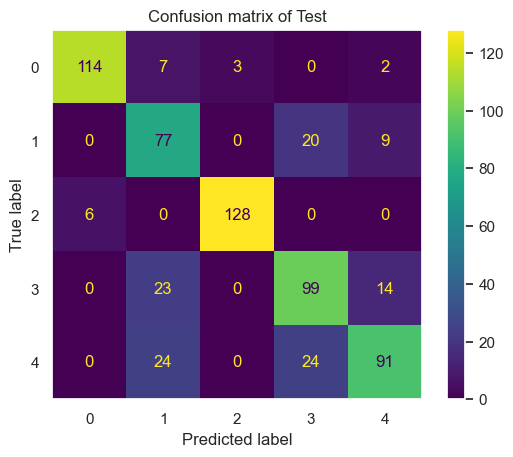

In [107]:
dt_cm_test_postpruning_2 = metrics.confusion_matrix(y_test_2, dt_pred_test_final_2)
dt_cm_test_display_postpruning_2 = metrics.ConfusionMatrixDisplay(confusion_matrix = dt_cm_test_postpruning_2)
dt_cm_test_display_postpruning_2.plot()
plt.title("Confusion matrix of Test")
plt.grid(None)
plt.show() 

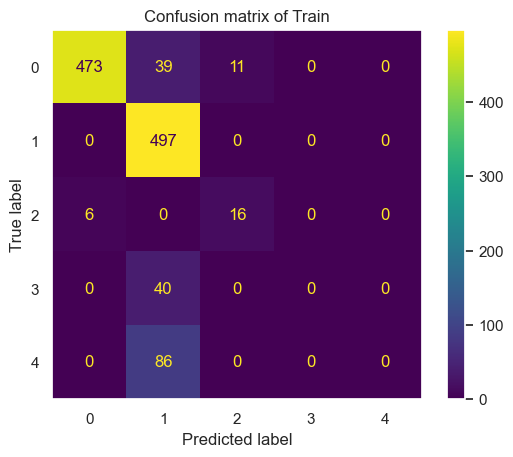

In [108]:
dt_cm_train_postpruning_2 = metrics.confusion_matrix(y_train_2, dt_pred_train_final_2)
dt_cm_train_display_postpruning_2 = metrics.ConfusionMatrixDisplay(confusion_matrix = dt_cm_train_postpruning_2)
dt_cm_train_display_postpruning.plot()
plt.title("Confusion matrix of Train")
plt.grid(None)
plt.show() 

Accuracy - Precision - Recall - F-1 Score

In [109]:
dt_accuracy_test_postpruning_2 = metrics.accuracy_score(y_test_2, dt_pred_test_final_2)
print('Test accuracy:')
print(dt_accuracy_test_postpruning_2)

dt_accuracy_train_postpruning_2 = metrics.accuracy_score(y_train_2, dt_pred_train_final_2)
print('Train accuracy:')
print(dt_accuracy_train_postpruning_2)

print("----------------------")

dt_precision_test_postpruning_2 = metrics.precision_score(y_test_2, dt_pred_test_final_2, average='weighted')
print('Test precision:')
print(dt_precision_test_postpruning_2)

dt_precision_train_postpruning_2 = metrics.precision_score(y_train_2, dt_pred_train_final_2, average='weighted')
print('Train precision:')
print(dt_precision_train_postpruning_2)

print("----------------------")

dt_recall_test_postpruning_2 = metrics.recall_score(y_test_2, dt_pred_test_final_2, average='weighted')
print('Test recall:')
print(dt_recall_test_postpruning_2)

dt_recall_train_postpruning_2 = metrics.recall_score(y_train_2, dt_pred_train_final_2, average='weighted')
print('Train recall:')
print(dt_recall_train_postpruning_2)

print("----------------------")

dt_f1_score_test_postpruning_2 = metrics.f1_score(y_test_2, dt_pred_test_final_2, average='weighted')
print('Test f1 score:')
print(dt_f1_score_test_postpruning_2)

dt_f1_score_train_postpruning_2 = metrics.f1_score(y_train_2, dt_pred_train_final_2, average='weighted')
print('Train f1 score:')
print(dt_f1_score_train_postpruning_2)

Test accuracy:
0.7940717628705148
Train accuracy:
0.8510140405616224
----------------------
Test precision:
0.8052006097090421
Train precision:
0.8560545218024691
----------------------
Test recall:
0.7940717628705148
Train recall:
0.8510140405616224
----------------------
Test f1 score:
0.7969284769250644
Train f1 score:
0.8521603213589529


Classification Report

In [110]:
print("Classification Report of Test: ")
print(classification_report(y_test_2, dt_pred_test_final_2))

print("----------------------")

print("Classification Report of Train: ")
print(classification_report(y_train_2, dt_pred_train_final_2))

Classification Report of Test: 
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       126
           1       0.59      0.73      0.65       106
           2       0.98      0.96      0.97       134
           3       0.69      0.73      0.71       136
           4       0.78      0.65      0.71       139

    accuracy                           0.79       641
   macro avg       0.80      0.79      0.79       641
weighted avg       0.81      0.79      0.80       641

----------------------
Classification Report of Train: 
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       515
           1       0.73      0.78      0.76       535
           2       0.97      0.98      0.97       507
           3       0.76      0.84      0.80       505
           4       0.84      0.75      0.80       502

    accuracy                           0.85      2564
   macro avg       0.86      0.85      0.85

#### 2- Random Forest Classifier

In [111]:
rf_2 = RandomForestClassifier()#n_estimators =40, random_state = 0)
rf_2.fit(x_train_2,y_train_2)

RandomForestClassifier()

In [112]:
rf_pred_test_2 = rf_2.predict(x_test_2)
print("Test Features Expected Classification")
print(y_test_2)
print("Prediction")
print(rf_pred_test_2)

Test Features Expected Classification
[1 2 1 2 4 1 3 2 3 3 4 0 3 4 1 2 1 1 1 4 0 1 4 2 4 4 2 2 2 0 1 1 3 4 4 0 3
 1 4 4 4 1 2 0 0 1 0 4 2 0 4 4 2 2 4 0 1 1 2 0 3 3 3 1 4 4 4 3 3 0 1 3 3 3
 2 3 1 3 3 1 3 3 2 2 2 1 4 4 0 4 2 3 0 0 0 2 4 4 1 4 4 0 1 4 0 1 3 1 4 0 3
 3 4 2 0 1 0 0 0 4 4 0 4 4 0 0 0 0 0 1 1 3 1 3 3 1 4 4 1 3 4 1 4 0 4 3 0 4
 4 4 3 4 1 0 2 3 3 4 0 4 2 0 3 3 0 2 3 4 2 4 1 0 4 3 1 1 0 0 0 4 3 4 3 2 2
 0 1 3 4 2 2 3 2 4 2 2 4 2 0 2 1 3 2 4 4 2 4 0 2 1 0 3 1 4 3 3 0 2 0 1 0 2
 2 1 4 3 3 4 4 2 2 4 4 3 3 2 0 4 1 2 2 0 1 4 4 4 4 2 1 3 0 1 1 3 0 4 3 3 3
 4 0 4 0 1 1 0 3 2 3 1 3 1 0 2 2 0 0 2 0 1 0 2 0 0 4 2 3 0 0 3 1 2 3 2 4 3
 1 0 1 0 0 1 4 0 2 4 2 2 0 2 2 1 2 1 2 2 3 2 0 3 3 0 0 3 4 3 3 0 1 0 2 4 3
 3 2 0 1 2 3 3 1 3 4 1 3 1 2 4 0 4 0 4 1 4 2 0 2 2 3 0 3 3 2 3 3 2 3 4 2 2
 1 0 1 4 4 0 0 1 3 4 0 2 0 3 1 0 2 3 1 0 2 1 2 0 0 3 3 2 4 2 0 4 3 0 0 0 4
 0 0 1 4 2 1 1 4 3 1 0 3 0 3 4 0 0 3 2 2 0 3 4 0 3 3 2 2 4 1 3 2 2 2 1 1 4
 4 3 4 4 4 0 4 1 1 3 2 4 2 0 0 2 0 1 4 1 4 0 1 3 4 4 2 2 1 2 2

In [113]:
rf_pred_train_2 = rf_2.predict(x_train_2)
print("Train Features Expected Classification")
print(y_train_2)
print("Prediction")
print(rf_pred_train_2)

Train Features Expected Classification
[0 3 3 ... 0 1 3]
Prediction
[0 3 3 ... 0 1 3]


#### Results

Confusion Matrix

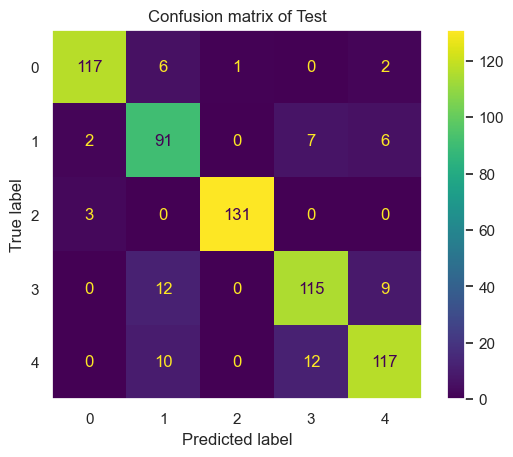

In [114]:
rf_cm_test_2 = metrics.confusion_matrix(y_test_2, rf_pred_test_2)
rf_cm_test_display_2 = metrics.ConfusionMatrixDisplay(confusion_matrix = rf_cm_test_2)
rf_cm_test_display_2.plot()
plt.title("Confusion matrix of Test")
plt.grid(None)
plt.show() 

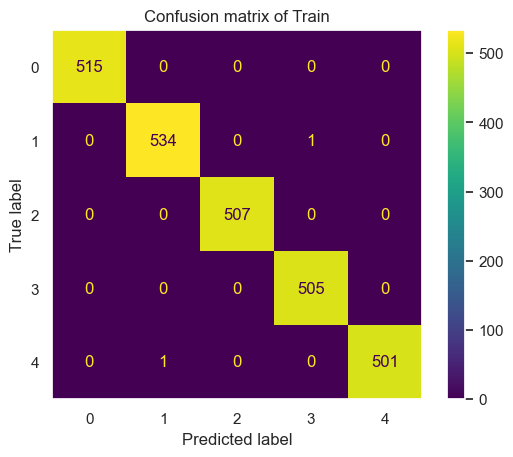

In [115]:
rf_cm_train_2 = metrics.confusion_matrix(y_train_2, rf_pred_train_2)
rf_cm_train_display_2 = metrics.ConfusionMatrixDisplay(confusion_matrix = rf_cm_train_2)
rf_cm_train_display_2.plot()
plt.title("Confusion matrix of Train")
plt.grid(None)
plt.show() 

Accuracy - Precision - Recall - F-1 Score

In [116]:
rf_accuracy_test_2 = metrics.accuracy_score(y_test_2, rf_pred_test_2)
print('Test accuracy:')
print(rf_accuracy_test_2)

rf_accuracy_train_2 = metrics.accuracy_score(y_train_2, rf_pred_train_2)
print('Train accuracy:')
print(rf_accuracy_train_2)

print("----------------------")

rf_precision_test_2 = metrics.precision_score(y_test_2, rf_pred_test_2, average='weighted')
print('Test precision:')
print(rf_precision_test_2)

rf_precision_train_2 = metrics.precision_score(y_train_2, rf_pred_train_2, average='weighted')
print('Train precision:')
print(rf_precision_train_2)

print("----------------------")

rf_recall_test_2 = metrics.recall_score(y_test_2, rf_pred_test_2, average='weighted')
print('Test recall:')
print(rf_recall_test_2)

rf_recall_train_2 = metrics.recall_score(y_train_2, rf_pred_train_2, average='weighted')
print('Train recall:')
print(rf_recall_train_2)

print("----------------------")

rf_f1_score_test_2 = metrics.f1_score(y_test_2, rf_pred_test_2, average='weighted')
print('Test f1 score:')
print(rf_f1_score_test_2)

rf_f1_score_train_2 = metrics.f1_score(y_train_2, rf_pred_train_2, average='weighted')
print('Train f1 score:')
print(rf_f1_score_train_2)

Test accuracy:
0.890795631825273
Train accuracy:
0.999219968798752
----------------------
Test precision:
0.8938562045870039
Train precision:
0.9992207395805713
----------------------
Test recall:
0.890795631825273
Train recall:
0.999219968798752
----------------------
Test f1 score:
0.891745694847332
Train f1 score:
0.9992199672602788


Classification Report

In [117]:
print("Classification Report of Test: ")
print(classification_report(y_test_2, rf_pred_test_2))

print("----------------------")

print("Classification Report of Train: ")
print(classification_report(y_train_2,rf_pred_train_2))

Classification Report of Test: 
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       126
           1       0.76      0.86      0.81       106
           2       0.99      0.98      0.98       134
           3       0.86      0.85      0.85       136
           4       0.87      0.84      0.86       139

    accuracy                           0.89       641
   macro avg       0.89      0.89      0.89       641
weighted avg       0.89      0.89      0.89       641

----------------------
Classification Report of Train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       515
           1       1.00      1.00      1.00       535
           2       1.00      1.00      1.00       507
           3       1.00      1.00      1.00       505
           4       1.00      1.00      1.00       502

    accuracy                           1.00      2564
   macro avg       1.00      1.00      1.00

### Feature Scaling

In [118]:
scaler_2 = StandardScaler()
x_train_2 = scaler_2.fit_transform(x_train_2)
x_test_2 = scaler.transform(x_test_2)

#### 3- SVM 

In [119]:
svm_2 = SVC(kernel = 'linear', random_state = 0)
svm_2.fit(x_train_2, y_train_2)

SVC(kernel='linear', random_state=0)

In [120]:
svm_pred_test_2 = svm_2.predict(x_test_2)
print("Test Features Expected Classification")
print(y_test_2)
print("Prediction")
print(svm_pred_test_2)

Test Features Expected Classification
[1 2 1 2 4 1 3 2 3 3 4 0 3 4 1 2 1 1 1 4 0 1 4 2 4 4 2 2 2 0 1 1 3 4 4 0 3
 1 4 4 4 1 2 0 0 1 0 4 2 0 4 4 2 2 4 0 1 1 2 0 3 3 3 1 4 4 4 3 3 0 1 3 3 3
 2 3 1 3 3 1 3 3 2 2 2 1 4 4 0 4 2 3 0 0 0 2 4 4 1 4 4 0 1 4 0 1 3 1 4 0 3
 3 4 2 0 1 0 0 0 4 4 0 4 4 0 0 0 0 0 1 1 3 1 3 3 1 4 4 1 3 4 1 4 0 4 3 0 4
 4 4 3 4 1 0 2 3 3 4 0 4 2 0 3 3 0 2 3 4 2 4 1 0 4 3 1 1 0 0 0 4 3 4 3 2 2
 0 1 3 4 2 2 3 2 4 2 2 4 2 0 2 1 3 2 4 4 2 4 0 2 1 0 3 1 4 3 3 0 2 0 1 0 2
 2 1 4 3 3 4 4 2 2 4 4 3 3 2 0 4 1 2 2 0 1 4 4 4 4 2 1 3 0 1 1 3 0 4 3 3 3
 4 0 4 0 1 1 0 3 2 3 1 3 1 0 2 2 0 0 2 0 1 0 2 0 0 4 2 3 0 0 3 1 2 3 2 4 3
 1 0 1 0 0 1 4 0 2 4 2 2 0 2 2 1 2 1 2 2 3 2 0 3 3 0 0 3 4 3 3 0 1 0 2 4 3
 3 2 0 1 2 3 3 1 3 4 1 3 1 2 4 0 4 0 4 1 4 2 0 2 2 3 0 3 3 2 3 3 2 3 4 2 2
 1 0 1 4 4 0 0 1 3 4 0 2 0 3 1 0 2 3 1 0 2 1 2 0 0 3 3 2 4 2 0 4 3 0 0 0 4
 0 0 1 4 2 1 1 4 3 1 0 3 0 3 4 0 0 3 2 2 0 3 4 0 3 3 2 2 4 1 3 2 2 2 1 1 4
 4 3 4 4 4 0 4 1 1 3 2 4 2 0 0 2 0 1 4 1 4 0 1 3 4 4 2 2 1 2 2

In [121]:
svm_pred_train_2 = svm_2.predict(x_train_2)
print("Train Features Expected Classification")
print(y_train_2)
print("Prediction")
print(svm_pred_train_2)

Train Features Expected Classification
[0 3 3 ... 0 1 3]
Prediction
[0 4 1 ... 0 1 4]


#### Results

Confusion Matrix

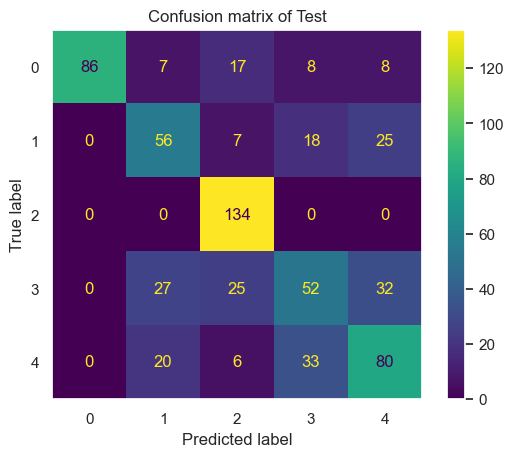

In [122]:
svm_cm_test_2 = metrics.confusion_matrix(y_test_2, svm_pred_test_2)
svm_cm_test_display_2 = metrics.ConfusionMatrixDisplay(confusion_matrix = svm_cm_test_2)
svm_cm_test_display_2.plot()
plt.title("Confusion matrix of Test")
plt.grid(None)
plt.show() 

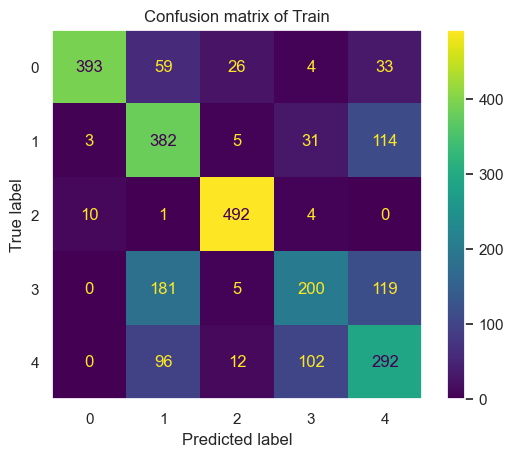

In [123]:
svm_cm_train_2 = metrics.confusion_matrix(y_train_2, svm_pred_train_2)
svm_cm_train_display_2 = metrics.ConfusionMatrixDisplay(confusion_matrix = svm_cm_train_2)
svm_cm_train_display_2.plot()
plt.title("Confusion matrix of Train")
plt.grid(None)
plt.show() 

Accuracy - Precision - Recall - F-1 Score

In [124]:
svm_accuracy_test_2 = metrics.accuracy_score(y_test_2, svm_pred_test_2)
print('Test accuracy:')
print(svm_accuracy_test_2)

svm_accuracy_train_2 = metrics.accuracy_score(y_train_2, svm_pred_train_2)
print('Train accuracy:')
print(svm_accuracy_train_2)

print("----------------------")

svm_precision_test_2 = metrics.precision_score(y_test_2, svm_pred_test_2, average='weighted')
print('Test precision:')
print(svm_precision_test_2)

svm_precision_train_2 = metrics.precision_score(y_train_2, svm_pred_train_2, average='weighted')
print('Train precision:')
print(svm_precision_train_2)

print("----------------------")

svm_recall_test_2 = metrics.recall_score(y_test_2, svm_pred_test_2, average='weighted')
print('Test recall:')
print(svm_recall_test_2)

svm_recall_train_2 = metrics.recall_score(y_train_2, svm_pred_train_2, average='weighted')
print('Train recall:')
print(svm_recall_train_2)

print("----------------------")

svm_f1_score_test_2 = metrics.f1_score(y_test_2, svm_pred_test_2, average='weighted')
print('Test f1 score:')
print(svm_f1_score_test_2)

svm_f1_score_train_2 = metrics.f1_score(y_train_2, svm_pred_train_2, average='weighted')
print('Train f1 score:')
print(svm_f1_score_train_2)

Test accuracy:
0.6365054602184087
Train accuracy:
0.6860374414976599
----------------------
Test precision:
0.6480035791779296
Train precision:
0.7034197395155901
----------------------
Test recall:
0.6365054602184087
Train recall:
0.6860374414976599
----------------------
Test f1 score:
0.6301794971071273
Train f1 score:
0.6853734286778176


Classification Report

In [125]:
print("Classification Report of Test: ")
print(classification_report(y_test_2,svm_pred_test_2))

print("----------------------")

print("Classification Report of Train: ")
print(classification_report(y_train_2,svm_pred_train_2))

Classification Report of Test: 
              precision    recall  f1-score   support

           0       1.00      0.68      0.81       126
           1       0.51      0.53      0.52       106
           2       0.71      1.00      0.83       134
           3       0.47      0.38      0.42       136
           4       0.55      0.58      0.56       139

    accuracy                           0.64       641
   macro avg       0.65      0.63      0.63       641
weighted avg       0.65      0.64      0.63       641

----------------------
Classification Report of Train: 
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       515
           1       0.53      0.71      0.61       535
           2       0.91      0.97      0.94       507
           3       0.59      0.40      0.47       505
           4       0.52      0.58      0.55       502

    accuracy                           0.69      2564
   macro avg       0.70      0.69      0.69

### Using K-Fold Cross Validation

In [126]:
kfold_cross_val_svm_2 = KFold(n_splits=10)
kfold_svm_2 = SVC(kernel = 'linear', random_state = 0)
results_kfold_svm_2 = cross_validate(kfold_svm_2, x_balanced, y_balanced, cv=kfold_cross_val_svm_2, scoring=scoring)

print(np.mean(results_kfold_svm_2['test_f1_score']))

c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Re

0.6098470178833856


c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 4- K-Nearest Neighbors (K-NN) 

In [127]:
knn_2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_2.fit(x_train_2, y_train_2)

KNeighborsClassifier()

In [128]:
knn_pred_test_2 = knn_2.predict(x_test_2)
print("Test Features Expected Classification")
print(y_test_2)
print("Prediction")
print(knn_pred_test_2)

Test Features Expected Classification
[1 2 1 2 4 1 3 2 3 3 4 0 3 4 1 2 1 1 1 4 0 1 4 2 4 4 2 2 2 0 1 1 3 4 4 0 3
 1 4 4 4 1 2 0 0 1 0 4 2 0 4 4 2 2 4 0 1 1 2 0 3 3 3 1 4 4 4 3 3 0 1 3 3 3
 2 3 1 3 3 1 3 3 2 2 2 1 4 4 0 4 2 3 0 0 0 2 4 4 1 4 4 0 1 4 0 1 3 1 4 0 3
 3 4 2 0 1 0 0 0 4 4 0 4 4 0 0 0 0 0 1 1 3 1 3 3 1 4 4 1 3 4 1 4 0 4 3 0 4
 4 4 3 4 1 0 2 3 3 4 0 4 2 0 3 3 0 2 3 4 2 4 1 0 4 3 1 1 0 0 0 4 3 4 3 2 2
 0 1 3 4 2 2 3 2 4 2 2 4 2 0 2 1 3 2 4 4 2 4 0 2 1 0 3 1 4 3 3 0 2 0 1 0 2
 2 1 4 3 3 4 4 2 2 4 4 3 3 2 0 4 1 2 2 0 1 4 4 4 4 2 1 3 0 1 1 3 0 4 3 3 3
 4 0 4 0 1 1 0 3 2 3 1 3 1 0 2 2 0 0 2 0 1 0 2 0 0 4 2 3 0 0 3 1 2 3 2 4 3
 1 0 1 0 0 1 4 0 2 4 2 2 0 2 2 1 2 1 2 2 3 2 0 3 3 0 0 3 4 3 3 0 1 0 2 4 3
 3 2 0 1 2 3 3 1 3 4 1 3 1 2 4 0 4 0 4 1 4 2 0 2 2 3 0 3 3 2 3 3 2 3 4 2 2
 1 0 1 4 4 0 0 1 3 4 0 2 0 3 1 0 2 3 1 0 2 1 2 0 0 3 3 2 4 2 0 4 3 0 0 0 4
 0 0 1 4 2 1 1 4 3 1 0 3 0 3 4 0 0 3 2 2 0 3 4 0 3 3 2 2 4 1 3 2 2 2 1 1 4
 4 3 4 4 4 0 4 1 1 3 2 4 2 0 0 2 0 1 4 1 4 0 1 3 4 4 2 2 1 2 2

c:\Users\elado\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [129]:
knn_pred_train_2 = knn.predict(x_train_2)
print("Train Features Expected Classification")
print(y_train_2)
print("Prediction")
print(knn_pred_train_2)

c:\Users\elado\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train Features Expected Classification
[0 3 3 ... 0 1 3]
Prediction
[4 1 1 ... 0 1 1]


#### Results

Confusion Matrix

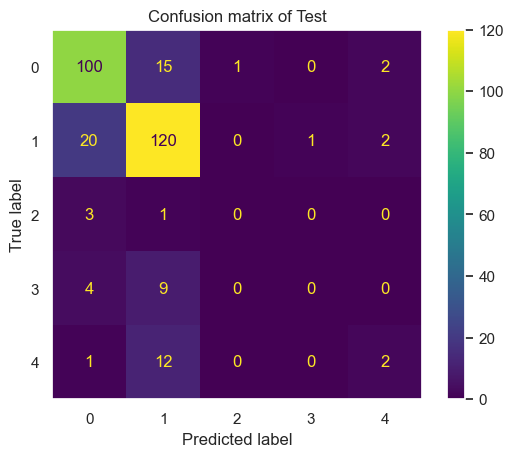

In [130]:
knn_cm_test = metrics.confusion_matrix(y_test, knn_pred_test)
knn_cm_test_display = metrics.ConfusionMatrixDisplay(confusion_matrix = knn_cm_test)
knn_cm_test_display.plot()
plt.title("Confusion matrix of Test")
plt.grid(None)
plt.show() 

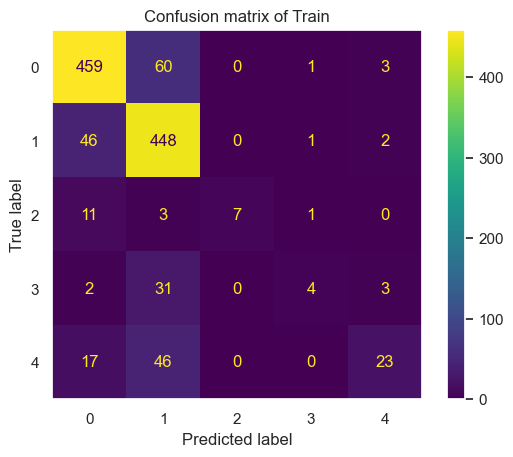

In [131]:
knn_cm_train = metrics.confusion_matrix(y_train, knn_pred_train)
knn_cm_train_display = metrics.ConfusionMatrixDisplay(confusion_matrix = knn_cm_train)
knn_cm_train_display.plot()
plt.title("Confusion matrix of Train")
plt.grid(None)
plt.show() 

Accuracy - Precision - Recall - F-1 Score

In [132]:
knn_accuracy_test_2 = metrics.accuracy_score(y_test_2, knn_pred_test_2)
print('Test accuracy:')
print(knn_accuracy_test_2)

knn_accuracy_train_2 = metrics.accuracy_score(y_train_2, knn_pred_train_2)
print('Train accuracy:')
print(knn_accuracy_train_2)

print("----------------------")

knn_precision_test_2 = metrics.precision_score(y_test_2, knn_pred_test_2, average='weighted')
print('Test precision:')
print(knn_precision_test_2)

knn_precision_train_2 = metrics.precision_score(y_train_2, knn_pred_train_2, average='weighted')
print('Train precision:')
print(knn_precision_train_2)

print("----------------------")

knn_recall_test_2 = metrics.recall_score(y_test_2, knn_pred_test_2, average='weighted')
print('Test recall:')
print(knn_recall_test_2)

knn_recall_train_2 = metrics.recall_score(y_train_2, knn_pred_train_2, average='weighted')
print('Train recall:')
print(knn_recall_train_2)

print("----------------------")

knn_f1_score_test_2 = metrics.f1_score(y_test_2, knn_pred_test_2, average='weighted')
print('Test f1 score:')
print(knn_f1_score_test_2)

knn_f1_score_train_2 = metrics.f1_score(y_train_2, knn_pred_train_2, average='weighted')
print('Train f1 score:')
print(knn_f1_score_train_2)

Test accuracy:
0.6318252730109204
Train accuracy:
0.3716848673946958
----------------------
Test precision:
0.6312983759940978
Train precision:
0.47125777849252404
----------------------
Test recall:
0.6318252730109204
Train recall:
0.3716848673946958
----------------------
Test f1 score:
0.6252250457942038
Train f1 score:
0.2605579747931971


Classification Report

In [133]:
print("Classification Report of Test: ")
print(classification_report(y_test_2,knn_pred_test_2))

print("----------------------")

print("Classification Report of Train: ")
print(classification_report(y_train_2,knn_pred_train_2))

Classification Report of Test: 
              precision    recall  f1-score   support

           0       0.73      0.70      0.72       126
           1       0.45      0.59      0.51       106
           2       0.81      0.96      0.88       134
           3       0.54      0.50      0.52       136
           4       0.59      0.42      0.49       139

    accuracy                           0.63       641
   macro avg       0.63      0.63      0.62       641
weighted avg       0.63      0.63      0.63       641

----------------------
Classification Report of Train: 
              precision    recall  f1-score   support

           0       0.36      0.81      0.50       515
           1       0.35      0.84      0.50       535
           2       1.00      0.03      0.06       507
           3       0.00      0.00      0.00       505
           4       0.65      0.14      0.23       502

    accuracy                           0.37      2564
   macro avg       0.47      0.36      0.26

### Using K-Fold Cross Validation

In [134]:
results_kfold_knn_2 = []
best_result_2 = 0
for j in range(1, 50):
    kfold_cross_val_knn_2 = KFold(n_splits=10)
    kfold_knn_2 = KNeighborsClassifier(n_neighbors = j)
    results_kfold_knn_2 = cross_validate(kfold_knn_2, x_balanced, y_balanced, cv=kfold_cross_val_knn_2, scoring=scoring)
    result_f1_mean_2 = np.mean(results_kfold_svm_2['test_f1_score'])
    if best_result_2 < result_f1_mean_2:
        best_kfold_knn_2 = results_kfold_knn_2
        best_result_2 = result_f1_mean_2
        best_n_2 = j

kfold_knn_f1_2 = best_result_2
print("Best result: " + str(best_result_2))
print("Best n: " + str(best_n_2))

c:\Users\elado\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\elado\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best result: 0.6098470178833856
Best n: 1


c:\Users\elado\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), 

#### 5- Logistic Regression 

In [135]:
logistic_reg_2 = LogisticRegression(max_iter=1000)
logistic_reg_2.fit(x_train_2, y_train_2)

LogisticRegression(max_iter=1000)

In [136]:
lr_pred_test_2 = logistic_reg_2.predict(x_test_2)
print("Test Features Expected Classification")
print(y_test_2)
print("Prediction")
print(lr_pred_test_2)

Test Features Expected Classification
[1 2 1 2 4 1 3 2 3 3 4 0 3 4 1 2 1 1 1 4 0 1 4 2 4 4 2 2 2 0 1 1 3 4 4 0 3
 1 4 4 4 1 2 0 0 1 0 4 2 0 4 4 2 2 4 0 1 1 2 0 3 3 3 1 4 4 4 3 3 0 1 3 3 3
 2 3 1 3 3 1 3 3 2 2 2 1 4 4 0 4 2 3 0 0 0 2 4 4 1 4 4 0 1 4 0 1 3 1 4 0 3
 3 4 2 0 1 0 0 0 4 4 0 4 4 0 0 0 0 0 1 1 3 1 3 3 1 4 4 1 3 4 1 4 0 4 3 0 4
 4 4 3 4 1 0 2 3 3 4 0 4 2 0 3 3 0 2 3 4 2 4 1 0 4 3 1 1 0 0 0 4 3 4 3 2 2
 0 1 3 4 2 2 3 2 4 2 2 4 2 0 2 1 3 2 4 4 2 4 0 2 1 0 3 1 4 3 3 0 2 0 1 0 2
 2 1 4 3 3 4 4 2 2 4 4 3 3 2 0 4 1 2 2 0 1 4 4 4 4 2 1 3 0 1 1 3 0 4 3 3 3
 4 0 4 0 1 1 0 3 2 3 1 3 1 0 2 2 0 0 2 0 1 0 2 0 0 4 2 3 0 0 3 1 2 3 2 4 3
 1 0 1 0 0 1 4 0 2 4 2 2 0 2 2 1 2 1 2 2 3 2 0 3 3 0 0 3 4 3 3 0 1 0 2 4 3
 3 2 0 1 2 3 3 1 3 4 1 3 1 2 4 0 4 0 4 1 4 2 0 2 2 3 0 3 3 2 3 3 2 3 4 2 2
 1 0 1 4 4 0 0 1 3 4 0 2 0 3 1 0 2 3 1 0 2 1 2 0 0 3 3 2 4 2 0 4 3 0 0 0 4
 0 0 1 4 2 1 1 4 3 1 0 3 0 3 4 0 0 3 2 2 0 3 4 0 3 3 2 2 4 1 3 2 2 2 1 1 4
 4 3 4 4 4 0 4 1 1 3 2 4 2 0 0 2 0 1 4 1 4 0 1 3 4 4 2 2 1 2 2

In [137]:
lr_pred_train_2 = logistic_reg_2.predict(x_train_2)
print("Train Features Expected Classification")
print(y_train_2)
print("Prediction")
print(lr_pred_train_2)

Train Features Expected Classification
[0 3 3 ... 0 1 3]
Prediction
[0 4 3 ... 0 1 4]


#### Results

Confusion Matrix

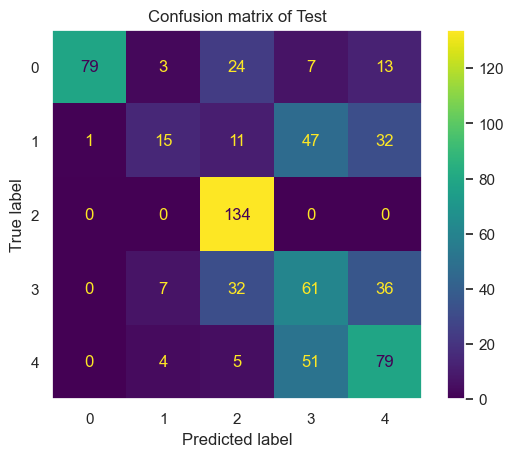

In [138]:
lr_cm_test_2 = metrics.confusion_matrix(y_test_2, lr_pred_test_2)
lr_cm_test_display_2 = metrics.ConfusionMatrixDisplay(confusion_matrix = lr_cm_test_2)
lr_cm_test_display_2.plot()
plt.title("Confusion matrix of Test")
plt.grid(None)
plt.show() 

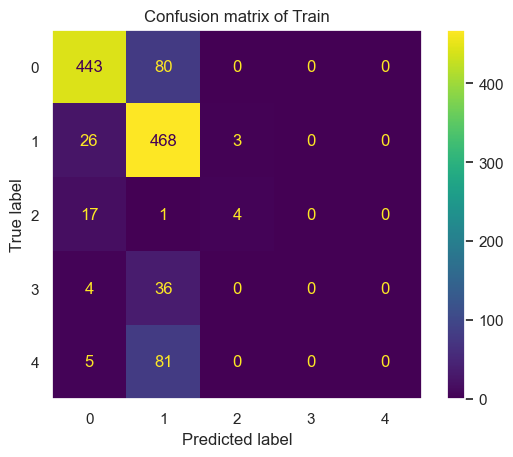

In [139]:
lr_cm_train = metrics.confusion_matrix(y_train, lr_pred_train)
lr_cm_train_display = metrics.ConfusionMatrixDisplay(confusion_matrix = lr_cm_train)
lr_cm_train_display.plot()
plt.title("Confusion matrix of Train")
plt.grid(None)
plt.show() 

Accuracy - Precision - Recall - F-1 Score

In [140]:
lr_accuracy_test_2 = metrics.accuracy_score(y_test_2, lr_pred_test_2)
print('Test accuracy:')
print(lr_accuracy_test_2)

lr_accuracy_train_2 = metrics.accuracy_score(y_train_2, lr_pred_train_2)
print('Train accuracy:')
print(lr_accuracy_train_2)

print("----------------------")

lr_precision_test_2 = metrics.precision_score(y_test_2, lr_pred_test_2, average='weighted')
print('Test precision:')
print(lr_precision_test_2)

lr_precision_train_2 = metrics.precision_score(y_train_2, lr_pred_train_2, average='weighted')
print('Train precision:')
print(lr_precision_train_2)

print("----------------------")

lr_recall_test_2 = metrics.recall_score(y_test_2, lr_pred_test_2, average='weighted')
print('Test recall:')
print(lr_recall_test_2)

lr_recall_train_2 = metrics.recall_score(y_train_2, lr_pred_train_2, average='weighted')
print('Train recall:')
print(lr_recall_train_2)

print("----------------------")

lr_f1_score_test_2 = metrics.f1_score(y_test_2, lr_pred_test_2, average='weighted')
print('Test f1 score:')
print(lr_f1_score_test_2)

lr_f1_score_train_2 = metrics.f1_score(y_train_2, lr_pred_train_2, average='weighted')
print('Train f1 score:')
print(lr_f1_score_train_2)

Test accuracy:
0.5741029641185648
Train accuracy:
0.6782371294851794
----------------------
Test precision:
0.6006626963573225
Train precision:
0.6890545416555589
----------------------
Test recall:
0.5741029641185648
Train recall:
0.6782371294851794
----------------------
Test f1 score:
0.5525924555913654
Train f1 score:
0.6800685396777897


Classification Report

In [141]:
print("Classification Report of Test: ")
print(classification_report(y_test_2,lr_pred_test_2))

print("----------------------")

print("Classification Report of Train: ")
print(classification_report(y_train_2,lr_pred_train_2))

Classification Report of Test: 
              precision    recall  f1-score   support

           0       0.99      0.63      0.77       126
           1       0.52      0.14      0.22       106
           2       0.65      1.00      0.79       134
           3       0.37      0.45      0.40       136
           4       0.49      0.57      0.53       139

    accuracy                           0.57       641
   macro avg       0.60      0.56      0.54       641
weighted avg       0.60      0.57      0.55       641

----------------------
Classification Report of Train: 
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       515
           1       0.55      0.67      0.60       535
           2       0.92      0.97      0.95       507
           3       0.52      0.46      0.49       505
           4       0.53      0.54      0.53       502

    accuracy                           0.68      2564
   macro avg       0.69      0.68      0.68

### Using K-Fold Cross Validation

In [142]:
kfold_cross_val_lr_2 = KFold(n_splits=10)
kfold_logistic_reg_2 = LogisticRegression(max_iter=1000)
results_kfold_lr_2 = cross_validate(kfold_logistic_reg_2, x_balanced, y_balanced, cv=kfold_cross_val_lr_2, scoring=scoring)

print(np.mean(results_kfold_lr_2['test_f1_score']))

c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is 

0.6632069096008391


c:\Users\elado\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Summarizing All Results

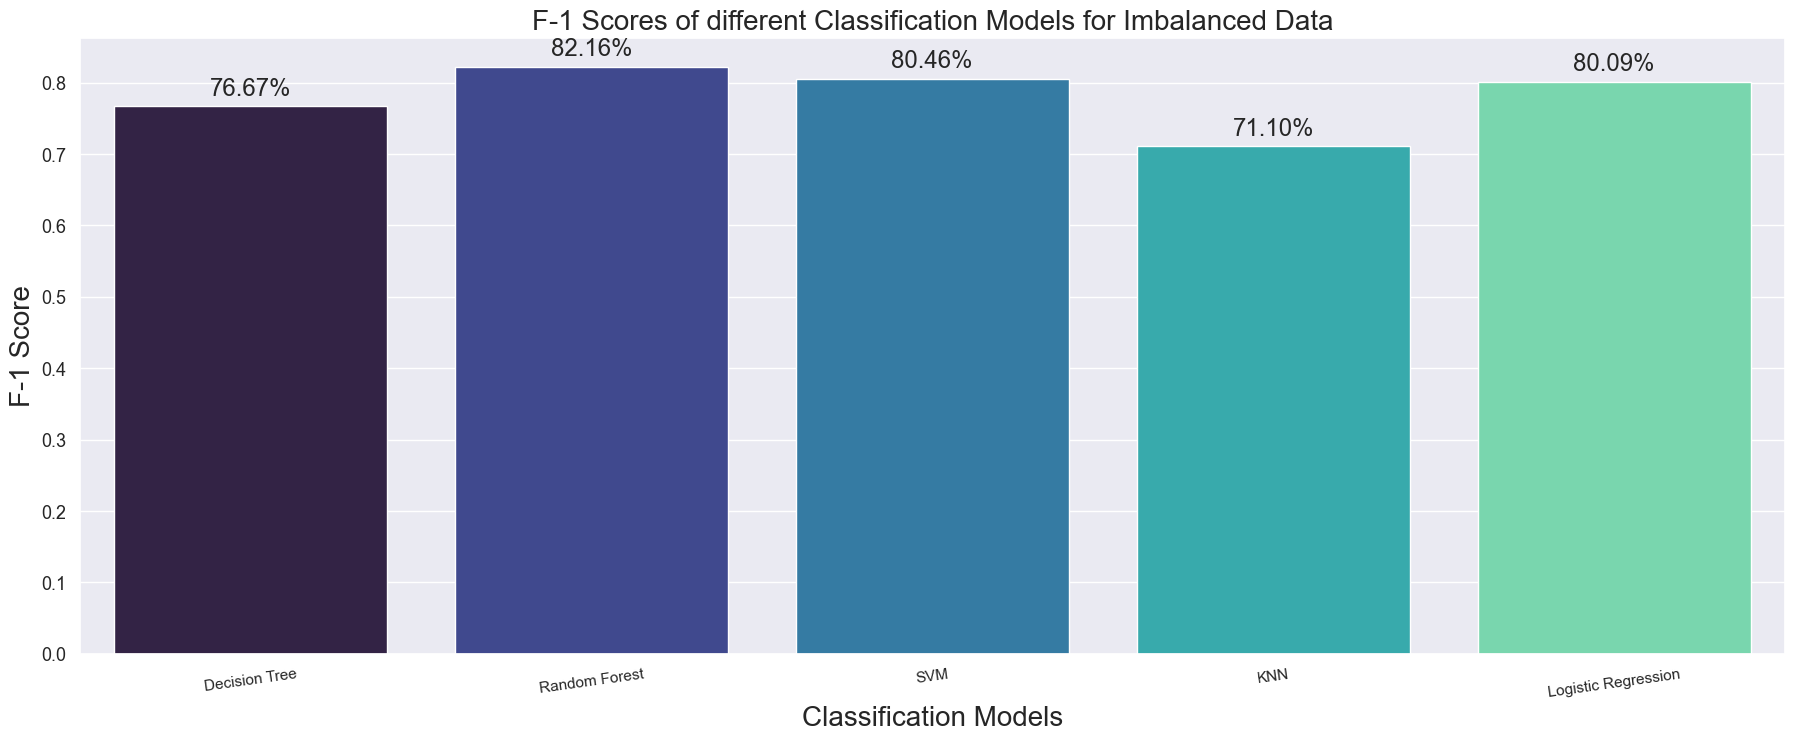

In [143]:
accuracies_imbalanced=[]
algorithms=[]

accuracies_imbalanced.append(dt_f1_score_test)
algorithms.append("Decision Tree")
accuracies_imbalanced.append(rf_f1_score_test)
algorithms.append("Random Forest")
accuracies_imbalanced.append(np.mean(results_kfold_svm['test_f1_score']))
algorithms.append("SVM")
accuracies_imbalanced.append(kfold_knn_f1)
algorithms.append("KNN")
accuracies_imbalanced.append(np.mean(results_kfold_lr['test_f1_score']))
algorithms.append("Logistic Regression")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(22,8))
ax = sns.barplot(x=algorithms, y=accuracies_imbalanced, palette = "mako", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("F-1 Score", fontsize = 20)
plt.title("F-1 Scores of different Classification Models for Imbalanced Data", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

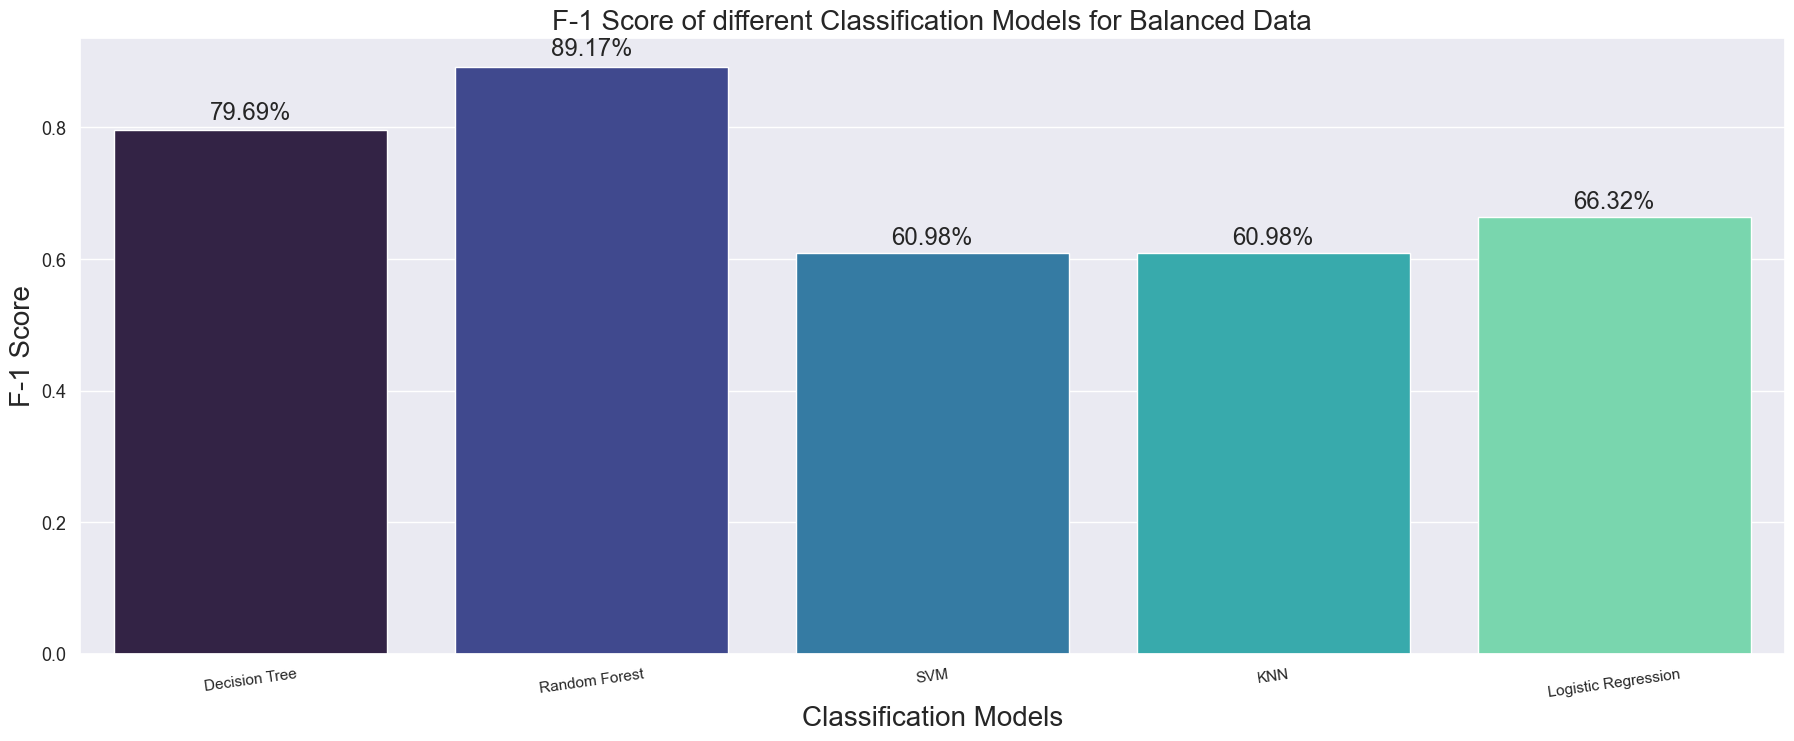

In [144]:
accuracies_balanced=[]

accuracies_balanced.append(dt_f1_score_test_postpruning_2)
accuracies_balanced.append(rf_f1_score_test_2)
accuracies_balanced.append(np.mean(results_kfold_svm_2['test_f1_score']))
accuracies_balanced.append(kfold_knn_f1_2)
accuracies_balanced.append(np.mean(results_kfold_lr_2['test_f1_score']))
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(22,8))
ax = sns.barplot(x=algorithms, y=accuracies_balanced, palette = "mako", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("F-1 Score", fontsize = 20)
plt.title("F-1 Score of different Classification Models for Balanced Data", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

Models find majority classes very well both with balanced and imbalanced data. But the models trained with imbalanced data is unsuccessful about learning and classifying minority classes. 

These graphs showing the F-1 Scores and imbalanced data percentages seem to be more higher, but to the perspective of learning all classes and classify them, models that trained with balanced data is widely more successful.